In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Electronics_Dataset/bfax851_11thdec-13thdec.csv")
df.head() # show first 5 rows of dataset

,Context,TimeStamp,Time Elapsed,Bias,DualFreqc_LF_ON,DualFreqc_LF_POWER,DualFreqr_LF_FORWARD,DualFreqr_LF_REFLECTED,EtchSoftEtchHours,EtchStep,IORack1c_RF_ON,IORack1r_B1Average,IORack1r_BSB,IORack1r_RF_FORWARD,IORack1r_RF_REFLECTED,IORack1r_TUNER_SERIES,IORack1r_TUNER_SHUNT,MKS1r_FlowRate,MKS2r_FlowRate,MKS5r_FlowRate,PinnaclerCurrent,PinnaclerPower,PinnaclerVoltage,ProcessCathodeSelected,ProcessEtchArgonFlow,ProcessEtchBRP,ProcessEtchLFPower,ProcessEtchPower,ProcessEtchStep1Time,THRTr_B2
0,28212862,2023/12/11 07:58:58.479,0.249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970933,NaN,NaN,NaN,NaN,99.992,NaN,0.363,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.50
1,28212862,2023/12/11 07:58:59.481,1.251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974597,NaN,NaN,NaN,NaN,99.993,NaN,0.394,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.30
2,28212862,2023/12/11 07:59:00.481,2.251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977040,NaN,NaN,NaN,NaN,99.992,NaN,0.422,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.25
3,28212862,2023/12/11 07:59:01.477,3.247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977040,NaN,NaN,NaN,NaN,99.998,NaN,0.448,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.20
4,28212862,2023/12/11 07:59:02.478,4.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977040,NaN,NaN,NaN,NaN,100.000,NaN,0.470,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.25


In [ ]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

In [ ]:
# make a function where we can see the statistics of dataset
def dataset_statistics(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_names = df.columns.tolist()
    data_types = df.dtypes.value_counts()

    # Print the statistics
    print(f"Total rows: {num_rows}\n")
    print(f"Total columns: {num_columns}\n")
    print(f"Column names: {column_names}\n")
    print("Any Duplicated Values: {}\n".format(df.duplicated().any())) # check duplicated values
    print("Data types:")
    print(data_types)

In [ ]:
# check the statistics of dataset
dataset_statistics(df)

Total rows: 118218

Total columns: 30

Column names: ['Context', 'TimeStamp', 'Time Elapsed', 'Bias', 'DualFreqc_LF_ON', 'DualFreqc_LF_POWER', 'DualFreqr_LF_FORWARD', 'DualFreqr_LF_REFLECTED', 'EtchSoftEtchHours', 'EtchStep', 'IORack1c_RF_ON', 'IORack1r_B1Average', 'IORack1r_BSB', 'IORack1r_RF_FORWARD', 'IORack1r_RF_REFLECTED', 'IORack1r_TUNER_SERIES', 'IORack1r_TUNER_SHUNT', 'MKS1r_FlowRate', 'MKS2r_FlowRate', 'MKS5r_FlowRate', 'PinnaclerCurrent', 'PinnaclerPower', 'PinnaclerVoltage', 'ProcessCathodeSelected', 'ProcessEtchArgonFlow', 'ProcessEtchBRP', 'ProcessEtchLFPower', 'ProcessEtchPower', 'ProcessEtchStep1Time', 'THRTr_B2']

Any Duplicated Values: False

Data types:
float64           28
int64              1
datetime64[ns]     1
dtype: int64


In [ ]:
# lets ensure data types match
data_types = df.dtypes.to_frame().rename(columns={0:'dtypes'})
print(tabulate(data_types, headers = 'keys', tablefmt = 'psql'))

+------------------------+----------------+
|                        | dtypes         |
|------------------------+----------------|
| Context                | int64          |
| TimeStamp              | datetime64[ns] |
| Time Elapsed           | float64        |
| Bias                   | float64        |
| DualFreqc_LF_ON        | float64        |
| DualFreqc_LF_POWER     | float64        |
| DualFreqr_LF_FORWARD   | float64        |
| DualFreqr_LF_REFLECTED | float64        |
| EtchSoftEtchHours      | float64        |
| EtchStep               | float64        |
| IORack1c_RF_ON         | float64        |
| IORack1r_B1Average     | float64        |
| IORack1r_BSB           | float64        |
| IORack1r_RF_FORWARD    | float64        |
| IORack1r_RF_REFLECTED  | float64        |
| IORack1r_TUNER_SERIES  | float64        |
| IORack1r_TUNER_SHUNT   | float64        |
| MKS1r_FlowRate         | float64        |
| MKS2r_FlowRate         | float64        |
| MKS5r_FlowRate         | float

In [ ]:
def check_unique_values(df):
  # Calculate the count of unique values for each column
  unique_value_counts = df.nunique()
  unique_counts_df = pd.DataFrame({'Column': unique_value_counts.index, 'Unique Count': unique_value_counts.values})
  print(tabulate(unique_counts_df, headers = 'keys', tablefmt = 'psql'))

In [ ]:
# Calculate the count of unique values for each column
check_unique_values(df)

+----+------------------------+----------------+
|    | Column                 |   Unique Count |
|----+------------------------+----------------|
|  0 | Context                |           1170 |
|  1 | TimeStamp              |          50221 |
|  2 | Time Elapsed           |          16843 |
|  3 | Bias                   |            536 |
|  4 | DualFreqc_LF_ON        |              2 |
|  5 | DualFreqc_LF_POWER     |             29 |
|  6 | DualFreqr_LF_FORWARD   |            156 |
|  7 | DualFreqr_LF_REFLECTED |            367 |
|  8 | EtchSoftEtchHours      |            254 |
|  9 | EtchStep               |              5 |
| 10 | IORack1c_RF_ON         |              2 |
| 11 | IORack1r_B1Average     |           4489 |
| 12 | IORack1r_BSB           |          13498 |
| 13 | IORack1r_RF_FORWARD    |            366 |
| 14 | IORack1r_RF_REFLECTED  |            252 |
| 15 | IORack1r_TUNER_SERIES  |            119 |
| 16 | IORack1r_TUNER_SHUNT   |            553 |
| 17 | MKS1r_FlowRat

In [ ]:
numeric_features = []
categorical_features = []

#splitting features into numeric and categoric
'''
whicheve feature has more than 10 category appending on mumeric_featrues and remaining are appending in categoric_features
'''

for col in df.columns:
  if df[col].nunique()>10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['Context', 'TimeStamp', 'Time Elapsed', 'Bias', 'DualFreqc_LF_POWER', 'DualFreqr_LF_FORWARD', 'DualFreqr_LF_REFLECTED', 'EtchSoftEtchHours', 'IORack1r_B1Average', 'IORack1r_BSB', 'IORack1r_RF_FORWARD', 'IORack1r_RF_REFLECTED', 'IORack1r_TUNER_SERIES', 'IORack1r_TUNER_SHUNT', 'MKS1r_FlowRate', 'MKS2r_FlowRate', 'MKS5r_FlowRate', 'PinnaclerCurrent', 'PinnaclerPower', 'PinnaclerVoltage', 'THRTr_B2']
category feature : ['DualFreqc_LF_ON', 'EtchStep', 'IORack1c_RF_ON', 'ProcessCathodeSelected', 'ProcessEtchArgonFlow', 'ProcessEtchBRP', 'ProcessEtchLFPower', 'ProcessEtchPower', 'ProcessEtchStep1Time']


In [ ]:
# lets Check for and address any inconsistent values in categorical columns.
def check_categorical_unique_values(categorical_columns):
    for col in categorical_columns:
        unique_values = df[col].unique()
        value_counts = df[col].value_counts()
        print(f">> Unique values in column '{col}':")
        for value in unique_values:
            count = value_counts.get(value, 0)
            print(f"\t| {value}: {count} occurrences")

In [ ]:
check_categorical_unique_values(categorical_features)

>> Unique values in column 'DualFreqc_LF_ON':
	| nan: 0 occurrences
	| 0.0: 3294 occurrences
	| 1.0: 37168 occurrences
>> Unique values in column 'EtchStep':
	| nan: 0 occurrences
	| 1.0: 10038 occurrences
	| 16.0: 1 occurrences
	| 11.0: 1 occurrences
	| 5.0: 1 occurrences
	| 2.0: 1 occurrences
>> Unique values in column 'IORack1c_RF_ON':
	| nan: 0 occurrences
	| 0.0: 3061 occurrences
	| 1.0: 37401 occurrences
>> Unique values in column 'ProcessCathodeSelected':
	| 1.0: 16771 occurrences
	| 2.0: 21555 occurrences
	| nan: 0 occurrences
	| 4.0: 5654 occurrences
	| 5.0: 10388 occurrences
>> Unique values in column 'ProcessEtchArgonFlow':
	| nan: 0 occurrences
	| 60.0: 40447 occurrences
	| 0.0: 15 occurrences
>> Unique values in column 'ProcessEtchBRP':
	| nan: 0 occurrences
	| 1e-06: 8475 occurrences
	| 1.5e-06: 31974 occurrences
	| 0.0: 13 occurrences
>> Unique values in column 'ProcessEtchLFPower':
	| nan: 0 occurrences
	| 600.0: 40449 occurrences
	| 0.0: 13 occurrences
>> Unique values

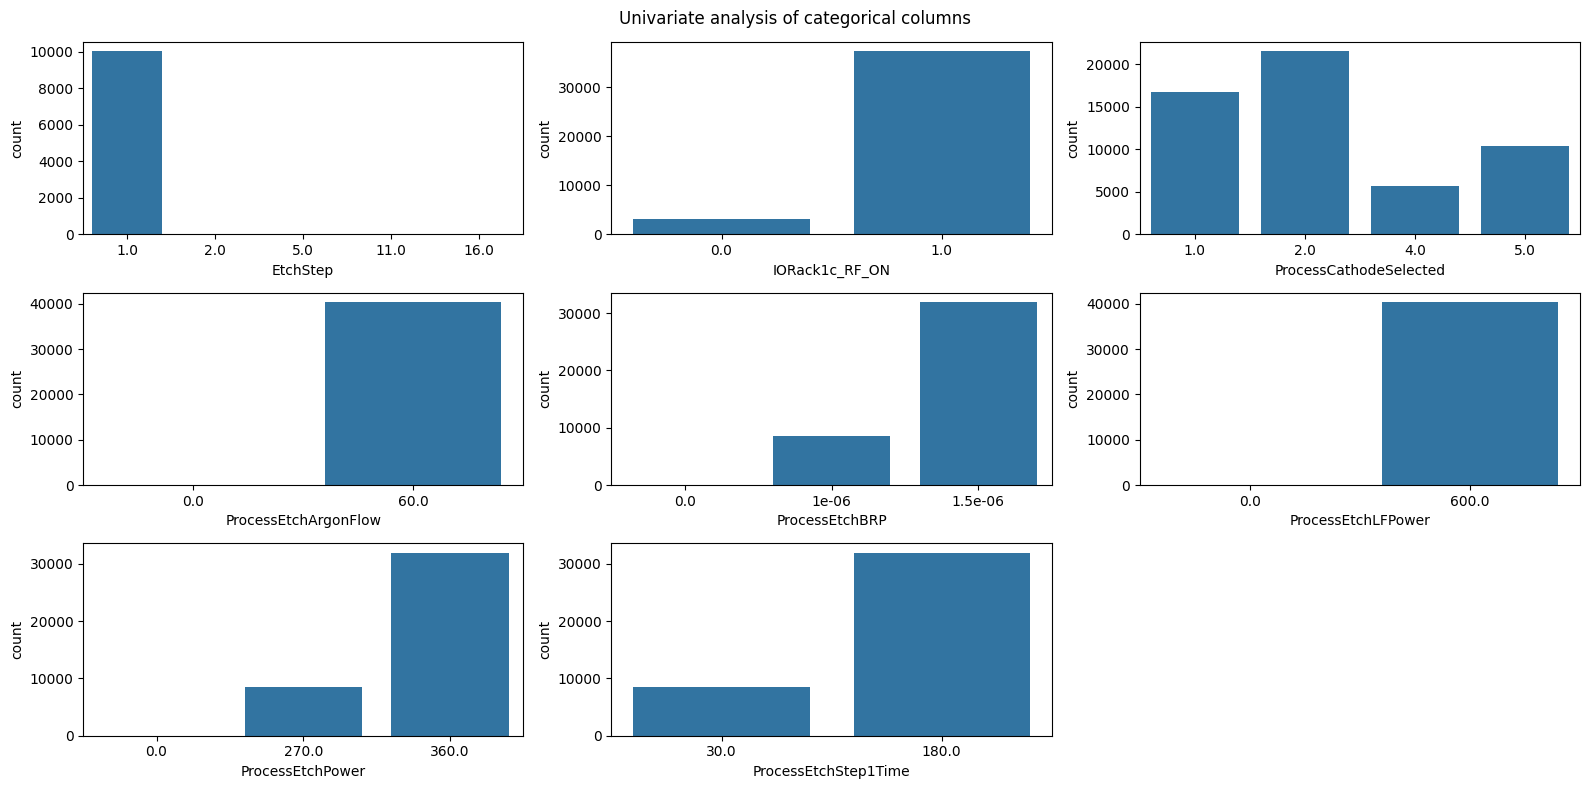

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Univariate analysis of categorical columns')

for i,col in enumerate(categorical_features[1:]):
  plt.subplot(3,3,i+1)
  sns.countplot(x=col,data=df)
  plt.xlabel(col)
  plt.tight_layout()

In [ ]:
def plot_numeric_cols(df, numeric_features):
    num_plots = len(numeric_features)
    rows = num_plots // 4 + (num_plots % 4 > 0)  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, 5 * rows))  # Adjust the figure size here
    plt.suptitle('Data distribution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

    for i, col in enumerate(numeric_features):
        row_index = i // 4
        col_index = i % 4
        ax = axes[row_index, col_index]
        sns.histplot(df[col], bins=20, kde=True, ax=ax)
        ax.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2, label='mean')
        ax.axvline(df[col].median(), color='red', linestyle='dotted', linewidth=2, label='median')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend()

    for i in range(num_plots, rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()

    plt.show()

In [ ]:
numeric_features.remove('TimeStamp')

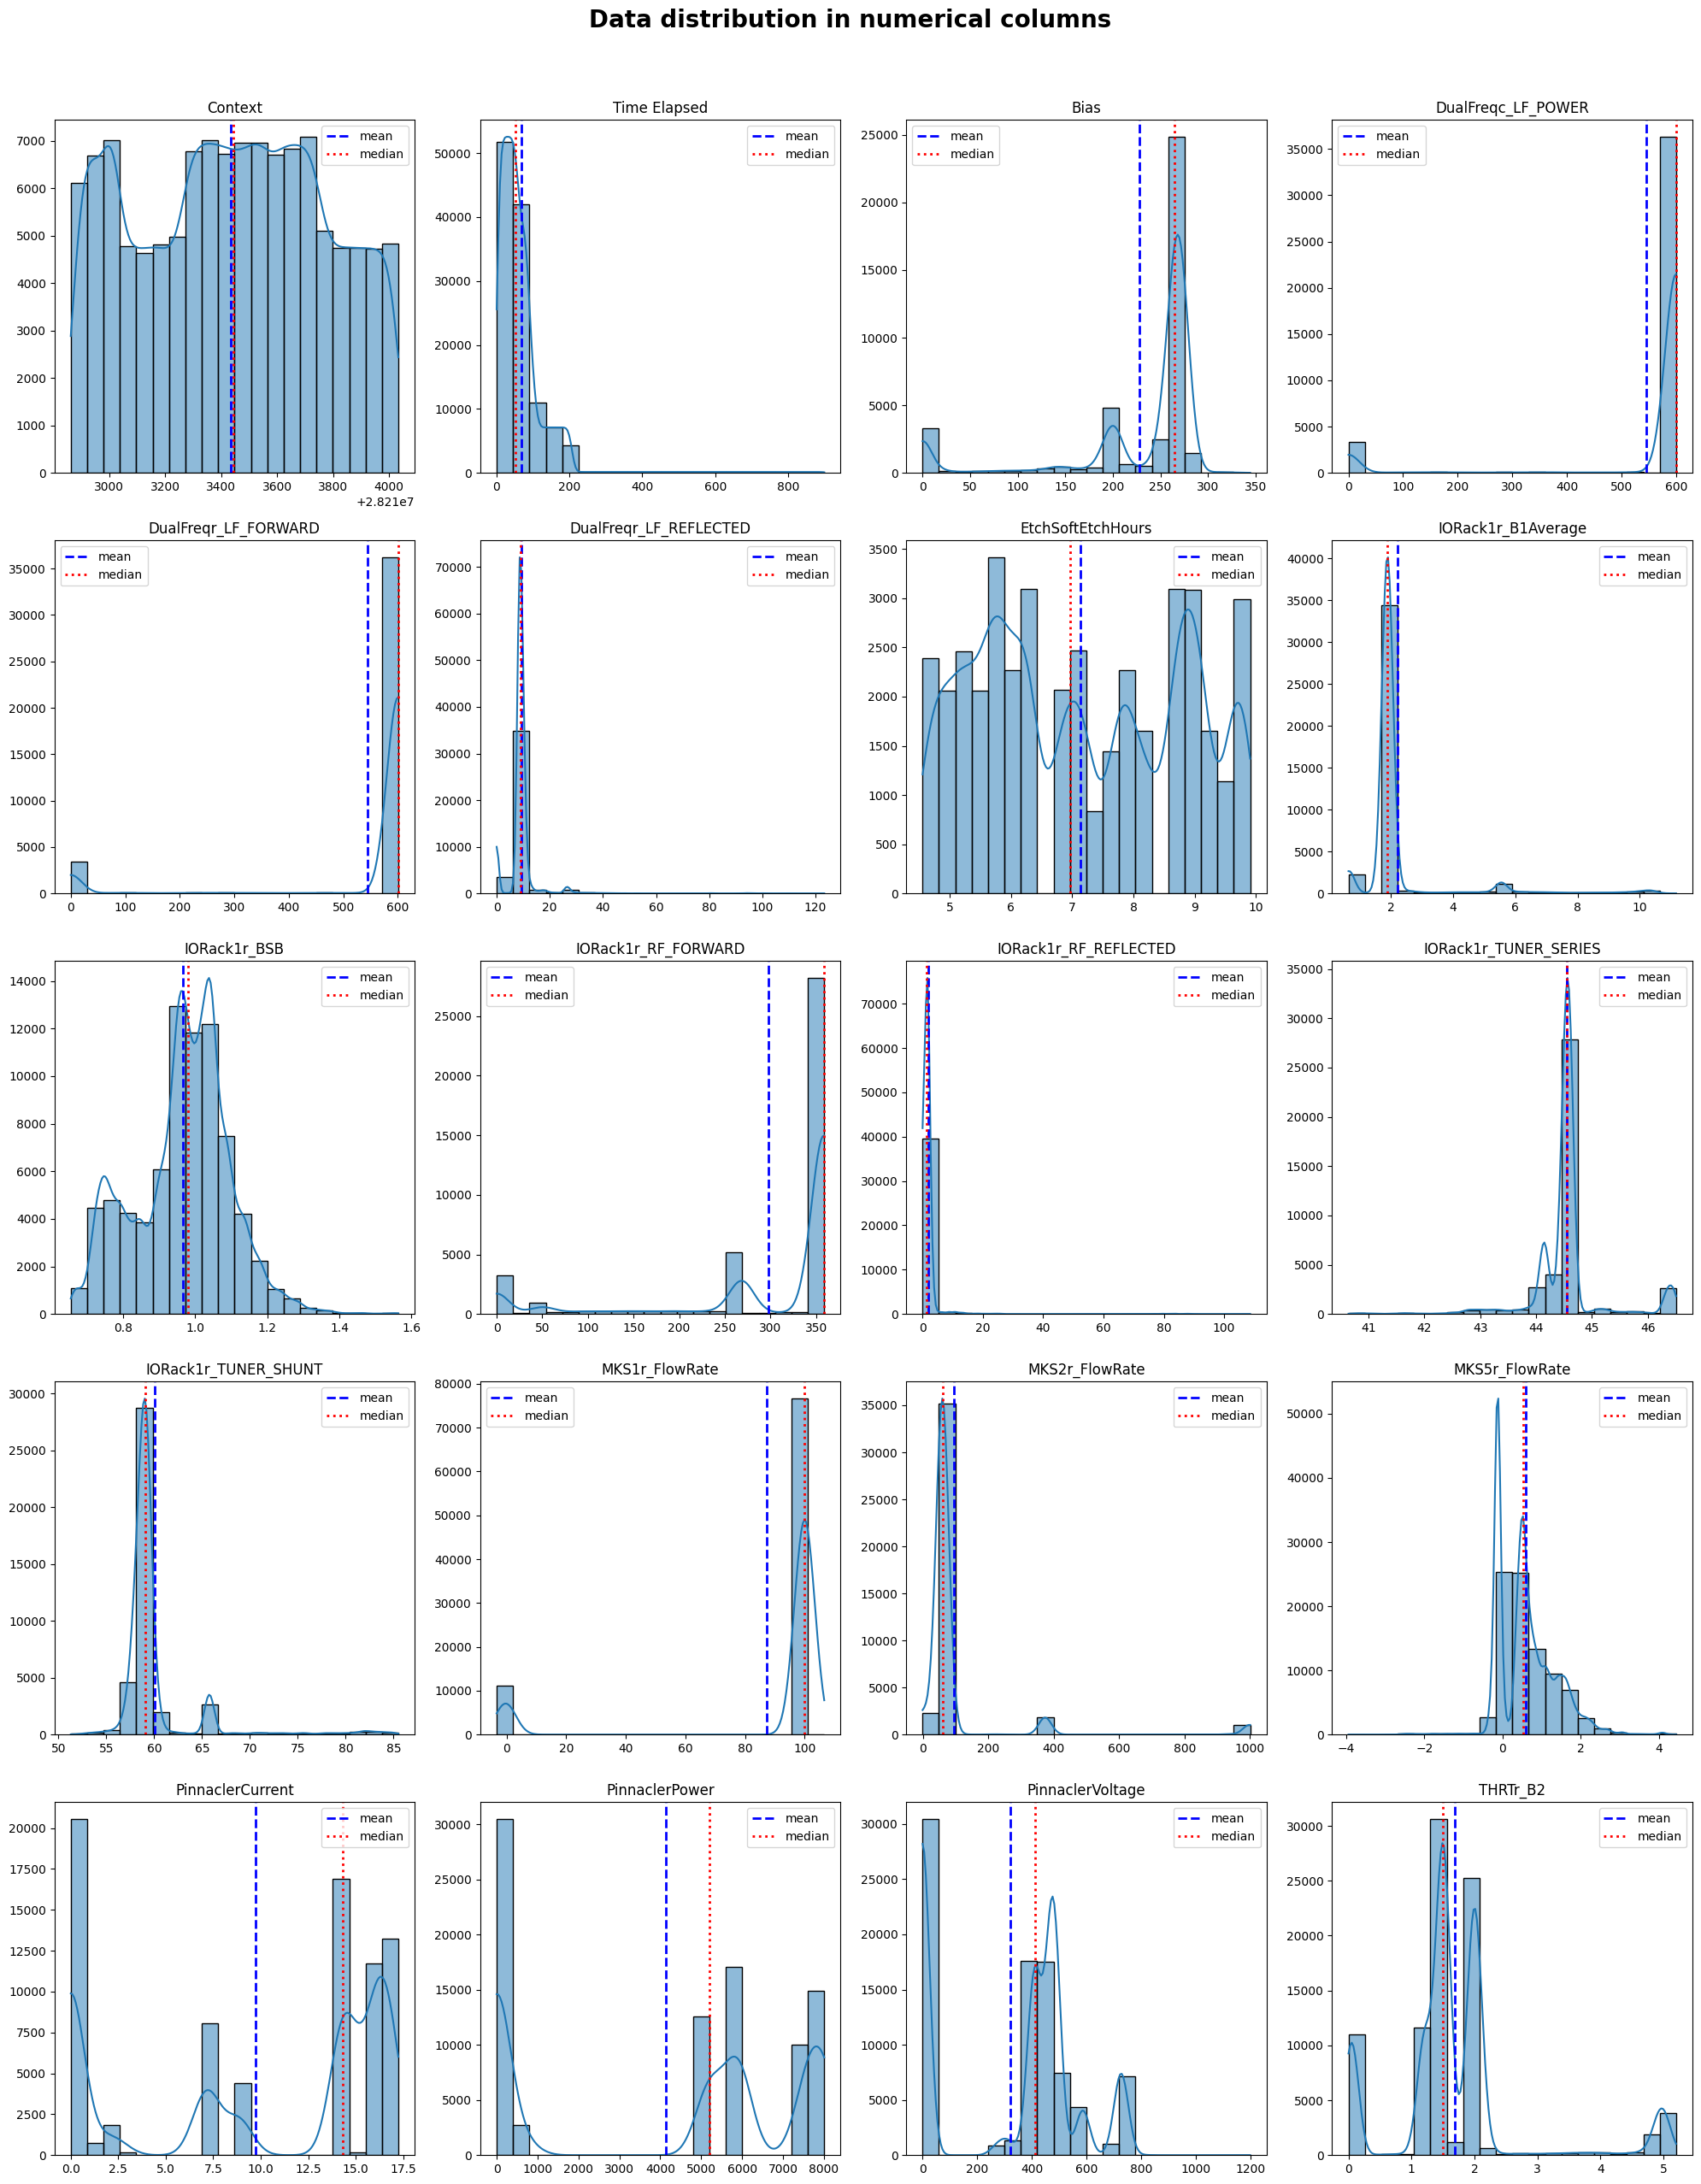

In [ ]:
plot_numeric_cols(df, numeric_features)

In [ ]:
# make a function in which we can see percentage of missing values,unique values,percentage of one catagory values
# and type against each column.
def get_overall_info_about_dataset(df):
    '''
    lets try to check the percentage of missing values,unique values,percentage of one catagory values
    and type against each column.
    '''
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
    print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))
    return df_

eda_res = get_overall_info_about_dataset(df)

+----+------------------------+-----------------+-------------------+------------------------------+----------------+
|    | Feature                |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type           |
|----+------------------------+-----------------+-------------------+------------------------------+----------------|
|  9 | EtchStep               |               5 |           91.5055 |                  91.5055     | float64        |
| 15 | IORack1r_TUNER_SERIES  |             119 |           65.7734 |                  65.7734     | float64        |
| 10 | IORack1c_RF_ON         |               2 |           65.7734 |                  65.7734     | float64        |
| 25 | ProcessEtchBRP         |               3 |           65.7734 |                  65.7734     | float64        |
| 18 | MKS2r_FlowRate         |            1442 |           65.7734 |                  65.7734     | float64        |
| 26 | ProcessEtchLFPower     |               2 |       

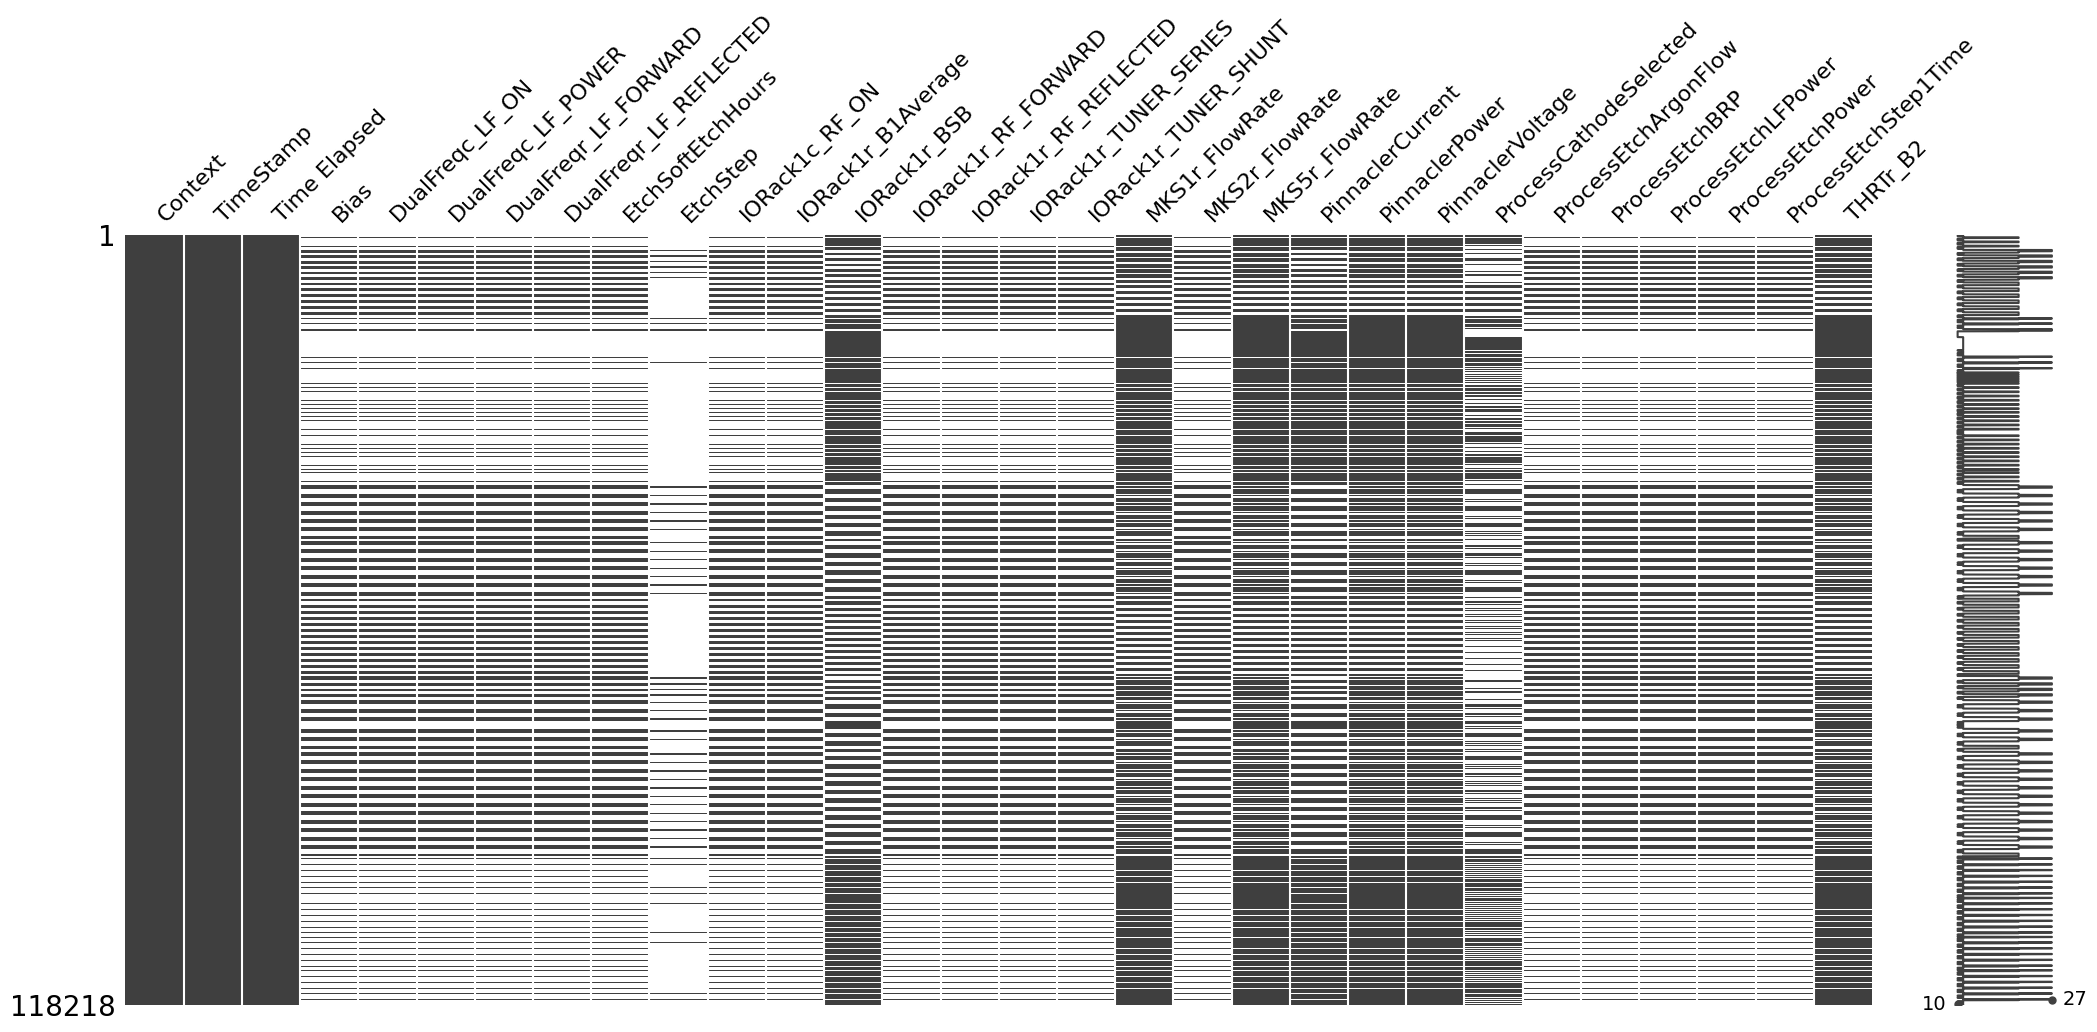

In [ ]:
import missingno as msno

# Visualize missing values
msno.matrix(df)
plt.show()

In [ ]:
df = df.fillna(0) # fill missing values with 0

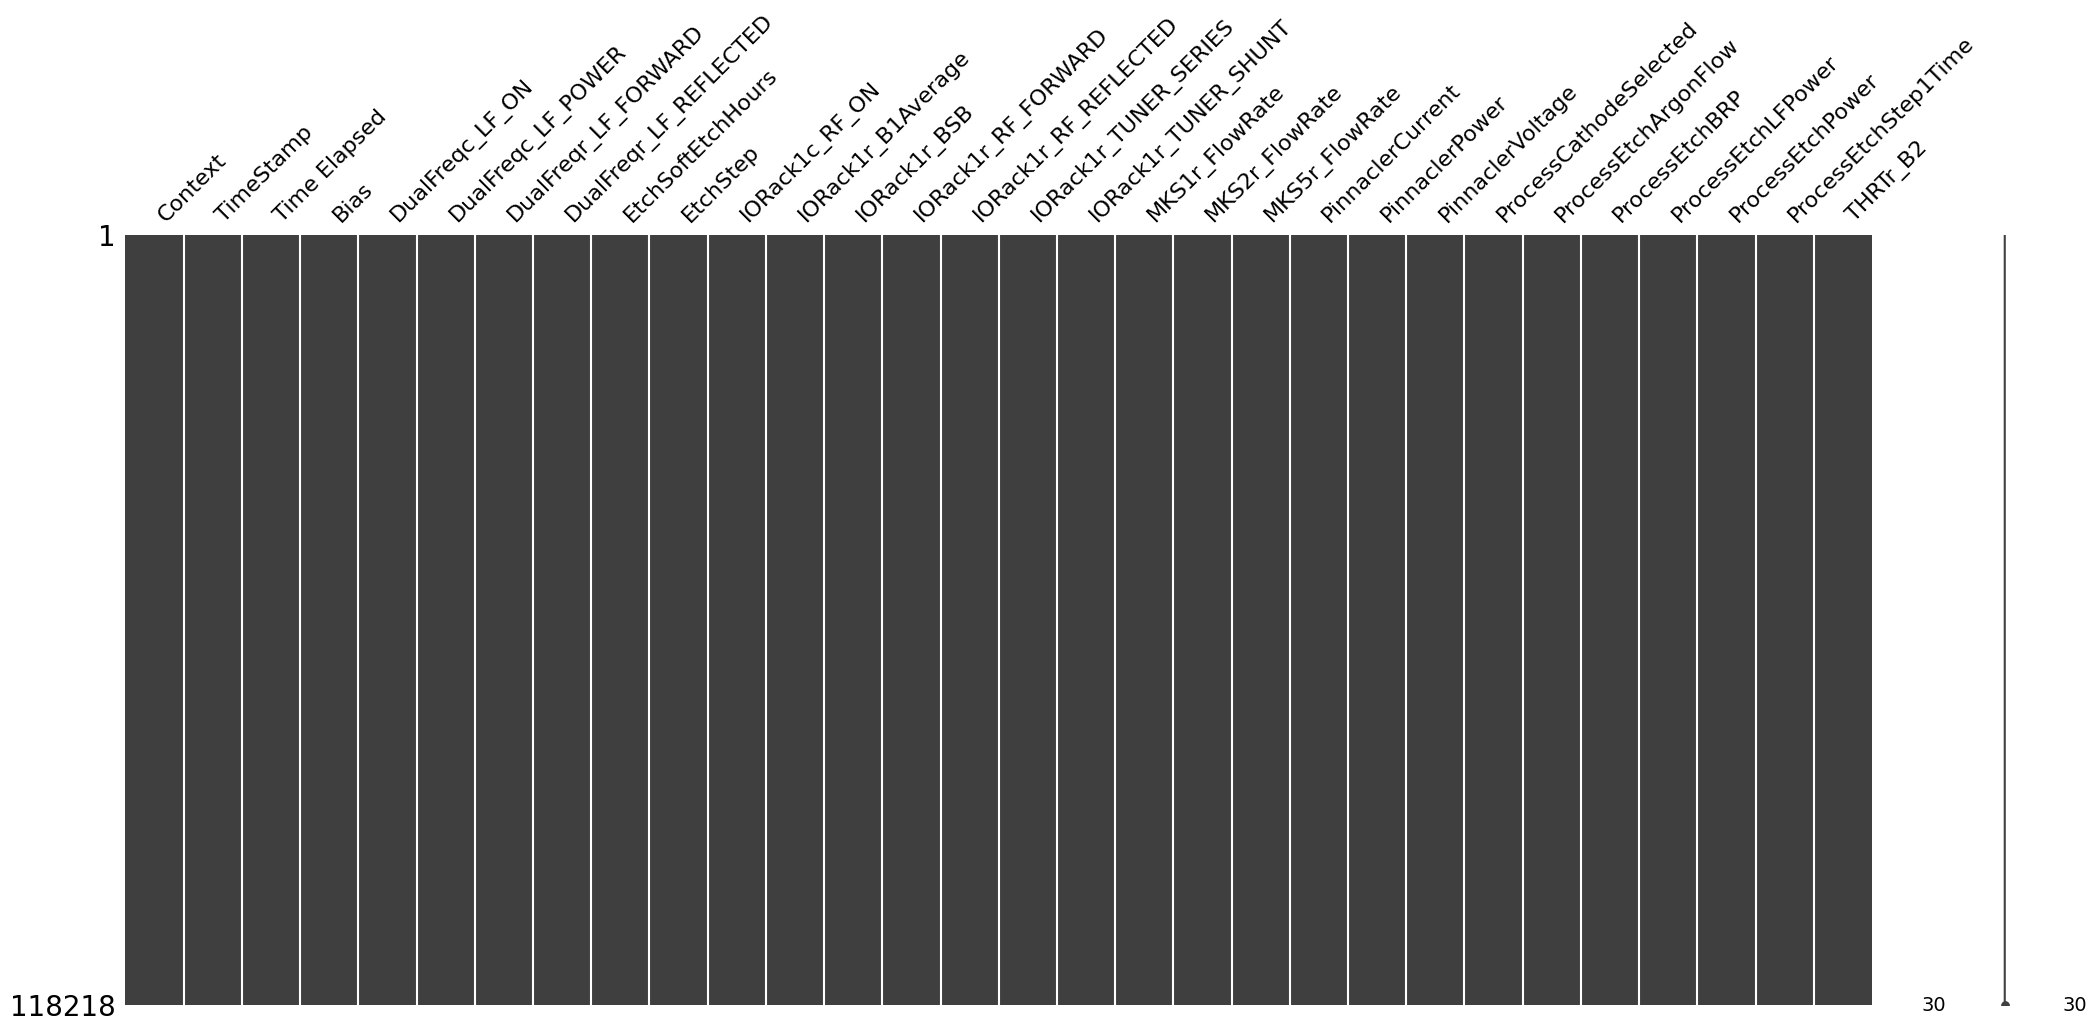

In [ ]:
# again check the missing values
msno.matrix(df)
plt.show()

In [ ]:
# again check the dataset
eda_res = get_overall_info_about_dataset(df)

+----+------------------------+-----------------+-------------------+------------------------------+----------------+
|    | Feature                |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type           |
|----+------------------------+-----------------+-------------------+------------------------------+----------------|
|  0 | Context                |            1170 |                 0 |                   0.761305   | int64          |
|  1 | TimeStamp              |           50221 |                 0 |                   0.00507537 | datetime64[ns] |
| 28 | ProcessEtchStep1Time   |               3 |                 0 |                  65.7734     | float64        |
| 27 | ProcessEtchPower       |               3 |                 0 |                  65.7878     | float64        |
| 26 | ProcessEtchLFPower     |               2 |                 0 |                  65.7844     | float64        |
| 25 | ProcessEtchBRP         |               3 |       

In [ ]:
# Group the data by 'Context' and calculate the average 'Time Elapsed' for each group
grouped_data = df.groupby('Context')['Time Elapsed'].mean().reset_index()

# Rename the 'Time Elapsed' column to 'Time Elapsed Avg'
grouped_data.rename(columns={'Time Elapsed': 'Time Elapsed Avg'}, inplace=True)

# Include additional columns in the grouped data along with their averages
additional_columns = ['MKS1r_FlowRate', 'MKS2r_FlowRate', 'MKS5r_FlowRate', 'PinnaclerCurrent', 'PinnaclerPower', 'PinnaclerVoltage']
for column in additional_columns:
    avg_column_name = f"{column}_Avg"
    grouped_data[avg_column_name] = df.groupby('Context')[column].mean().values

grouped_data.head(20)

,Context,Time Elapsed Avg,MKS1r_FlowRate_Avg,MKS2r_FlowRate_Avg,MKS5r_FlowRate_Avg,PinnaclerCurrent_Avg,PinnaclerPower_Avg,PinnaclerVoltage_Avg
0,28212862,47.750792,99.995719,0.000000,0.338958,12.023125,5723.229167,367.697917
1,28212863,48.250811,99.995758,0.000000,0.338705,12.149684,5783.473684,371.547368
2,28212864,43.261460,99.997713,0.000000,0.129356,5.850345,3430.804598,402.218391
3,28212865,43.761465,99.997698,0.000000,0.132500,5.918372,3470.697674,406.848837
4,28212866,27.738537,0.000000,149.726019,0.000000,0.000000,0.000000,0.000000
5,28212867,27.238491,0.000000,146.998800,0.000000,0.000000,0.000000,0.000000
6,28212868,43.752058,96.459826,0.000000,0.269802,11.313721,4623.953488,332.872093
7,28212869,43.252034,95.349782,0.000000,0.266011,11.183678,4570.804598,329.045977
8,28212870,48.755969,99.995531,0.000000,0.004823,12.184583,5802.812500,372.781250
9,28212871,48.755969,99.995531,0.000000,0.004823,12.184583,5802.812500,372.781250


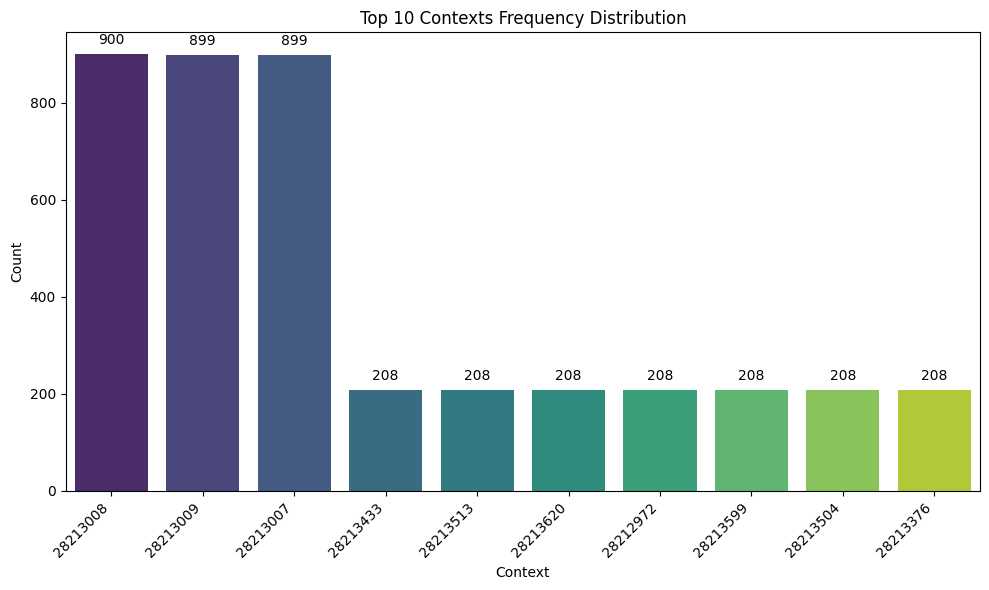

In [ ]:
# Aggregate the data to calculate the frequency (count) of each context
context_counts = df['Context'].value_counts().reset_index()
context_counts.columns = ['Context', 'Count']

# Select the top 10 contexts
top_10_contexts = context_counts.head(10)

# Create a count plot for the top 10 contexts
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df[df['Context'].isin(top_10_contexts['Context'])], x='Context', order=top_10_contexts['Context'], palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Top 10 Contexts Frequency Distribution')
plt.xlabel('Context')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("ContextDIS.png", bbox_inches='tight')
plt.show()

In [ ]:
top_context_res = grouped_data[grouped_data['Context'].isin(top_10_contexts['Context'].tolist())]
top_context_res

,Context,Time Elapsed Avg,MKS1r_FlowRate_Avg,MKS2r_FlowRate_Avg,MKS5r_FlowRate_Avg,PinnaclerCurrent_Avg,PinnaclerPower_Avg,PinnaclerVoltage_Avg
110,28212972,103.755385,0.000000,84.500644,0.000000,0.000000,0.000000,0.000000
145,28213007,450.264607,95.627643,0.000000,0.447061,0.583693,237.975528,23.140156
146,28213008,449.764597,95.521048,0.000000,0.446497,0.583044,237.711111,23.114444
147,28213009,450.264607,95.627643,0.000000,0.447061,0.583693,237.975528,23.140156
512,28213376,103.737611,0.000000,84.736053,0.000000,0.000000,0.000000,0.000000
569,28213433,103.736933,0.000000,85.954534,0.000000,0.000000,0.000000,0.000000
640,28213504,103.714534,0.000000,84.480971,0.000000,0.000000,0.000000,0.000000
649,28213513,103.753966,0.000000,85.925894,0.000000,0.000000,0.000000,0.000000
735,28213599,103.758779,0.000000,84.368019,0.000000,0.000000,0.000000,0.000000
756,28213620,103.773663,0.000000,86.033663,0.000000,0.000000,0.000000,0.000000


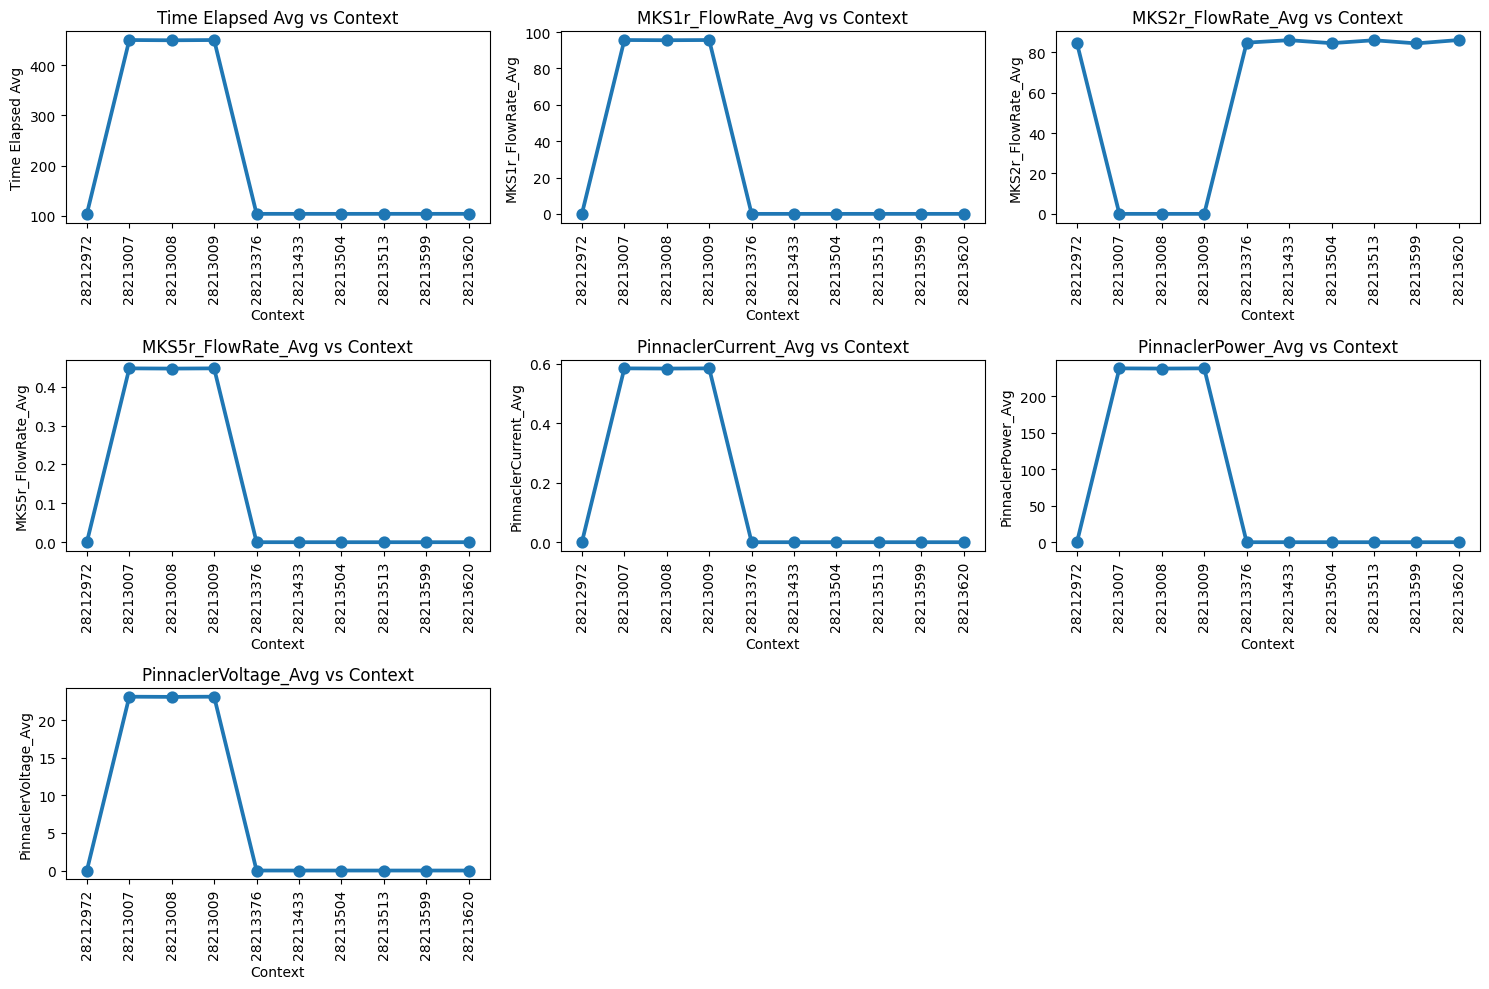

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Define the list of features to plot
features = top_context_res.columns[1:]

# Loop through each feature and create a subplot
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.pointplot(data=top_context_res, x='Context', y=feature)
    plt.title(f'{feature} vs Context')
    plt.xlabel('Context')
    plt.ylabel(feature)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig("contectVsALL.png", bbox_inches='tight')
plt.show()

In [ ]:
df.head()

,Context,TimeStamp,Time Elapsed,Bias,DualFreqc_LF_ON,DualFreqc_LF_POWER,DualFreqr_LF_FORWARD,DualFreqr_LF_REFLECTED,EtchSoftEtchHours,EtchStep,IORack1c_RF_ON,IORack1r_B1Average,IORack1r_BSB,IORack1r_RF_FORWARD,IORack1r_RF_REFLECTED,IORack1r_TUNER_SERIES,IORack1r_TUNER_SHUNT,MKS1r_FlowRate,MKS2r_FlowRate,MKS5r_FlowRate,PinnaclerCurrent,PinnaclerPower,PinnaclerVoltage,ProcessCathodeSelected,ProcessEtchArgonFlow,ProcessEtchBRP,ProcessEtchLFPower,ProcessEtchPower,ProcessEtchStep1Time,THRTr_B2
0,28212862,2023-12-11 07:58:58.479,0.249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970933,0.0,0.0,0.0,0.0,99.992,0.0,0.363,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.50
1,28212862,2023-12-11 07:58:59.481,1.251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974597,0.0,0.0,0.0,0.0,99.993,0.0,0.394,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.30
2,28212862,2023-12-11 07:59:00.481,2.251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977040,0.0,0.0,0.0,0.0,99.992,0.0,0.422,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.25
3,28212862,2023-12-11 07:59:01.477,3.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977040,0.0,0.0,0.0,0.0,99.998,0.0,0.448,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.20
4,28212862,2023-12-11 07:59:02.478,4.248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977040,0.0,0.0,0.0,0.0,100.000,0.0,0.470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.25


In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    c = ['green', 'red']
    ax = df_final[col].value_counts().plot(kind = 'bar', color = c)

    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].value_counts().plot.pie(explode=[0.02,0.02],autopct='%1.2f%%',shadow=True, colors = c,
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.savefig("target.png", bbox_inches='tight')
    plt.show()

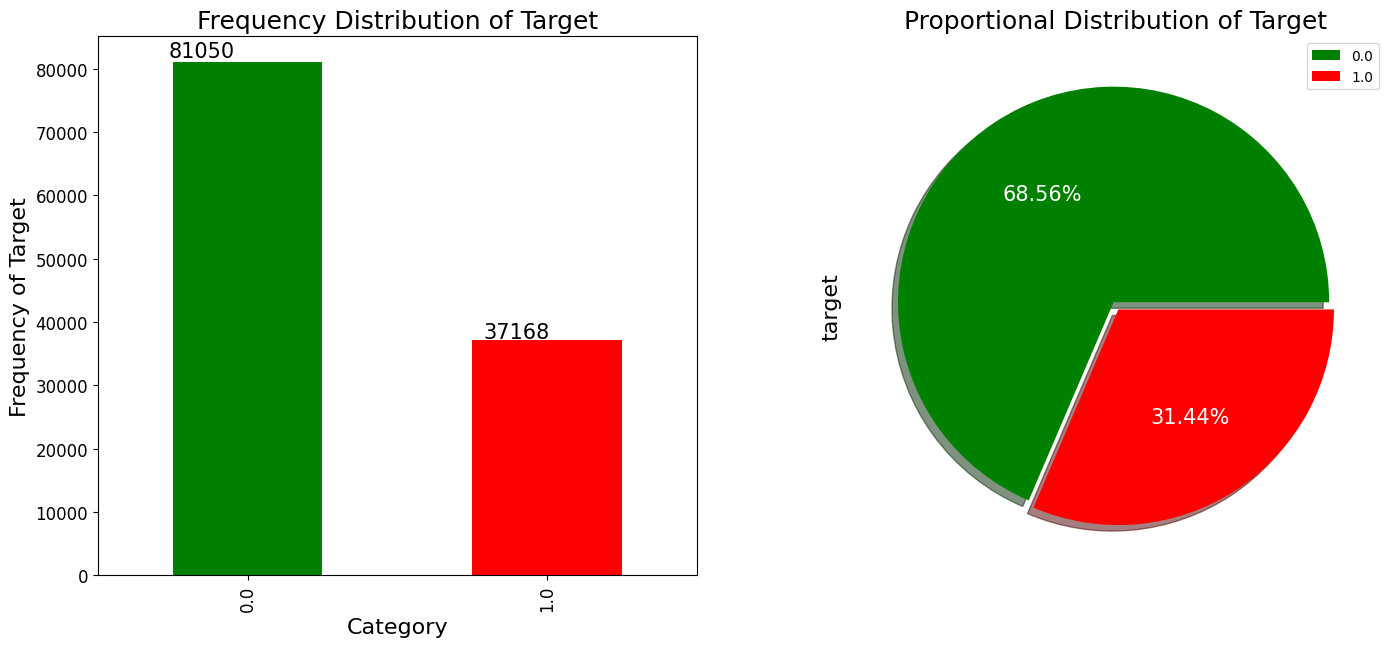

In [ ]:
target_distribution(df, "DualFreqc_LF_ON")

In [ ]:
# lets drop irrelevent features
df = df.drop(['TimeStamp'], axis = 1)
df.head()

,Context,Time Elapsed,Bias,DualFreqc_LF_ON,DualFreqc_LF_POWER,DualFreqr_LF_FORWARD,DualFreqr_LF_REFLECTED,EtchSoftEtchHours,EtchStep,IORack1c_RF_ON,IORack1r_B1Average,IORack1r_BSB,IORack1r_RF_FORWARD,IORack1r_RF_REFLECTED,IORack1r_TUNER_SERIES,IORack1r_TUNER_SHUNT,MKS1r_FlowRate,MKS2r_FlowRate,MKS5r_FlowRate,PinnaclerCurrent,PinnaclerPower,PinnaclerVoltage,ProcessCathodeSelected,ProcessEtchArgonFlow,ProcessEtchBRP,ProcessEtchLFPower,ProcessEtchPower,ProcessEtchStep1Time,THRTr_B2
0,28212862,0.249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.970933,0.0,0.0,0.0,0.0,99.992,0.0,0.363,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.50
1,28212862,1.251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974597,0.0,0.0,0.0,0.0,99.993,0.0,0.394,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.30
2,28212862,2.251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977040,0.0,0.0,0.0,0.0,99.992,0.0,0.422,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.25
3,28212862,3.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977040,0.0,0.0,0.0,0.0,99.998,0.0,0.448,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.20
4,28212862,4.248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.977040,0.0,0.0,0.0,0.0,100.000,0.0,0.470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Context                 118218 non-null  int64  
 1   Time Elapsed            118218 non-null  float64
 2   Bias                    118218 non-null  float64
 3   DualFreqc_LF_ON         118218 non-null  float64
 4   DualFreqc_LF_POWER      118218 non-null  float64
 5   DualFreqr_LF_FORWARD    118218 non-null  float64
 6   DualFreqr_LF_REFLECTED  118218 non-null  float64
 7   EtchSoftEtchHours       118218 non-null  float64
 8   EtchStep                118218 non-null  float64
 9   IORack1c_RF_ON          118218 non-null  float64
 10  IORack1r_B1Average      118218 non-null  float64
 11  IORack1r_BSB            118218 non-null  float64
 12  IORack1r_RF_FORWARD     118218 non-null  float64
 13  IORack1r_RF_REFLECTED   118218 non-null  float64
 14  IORack1r_TUNER_SERIE

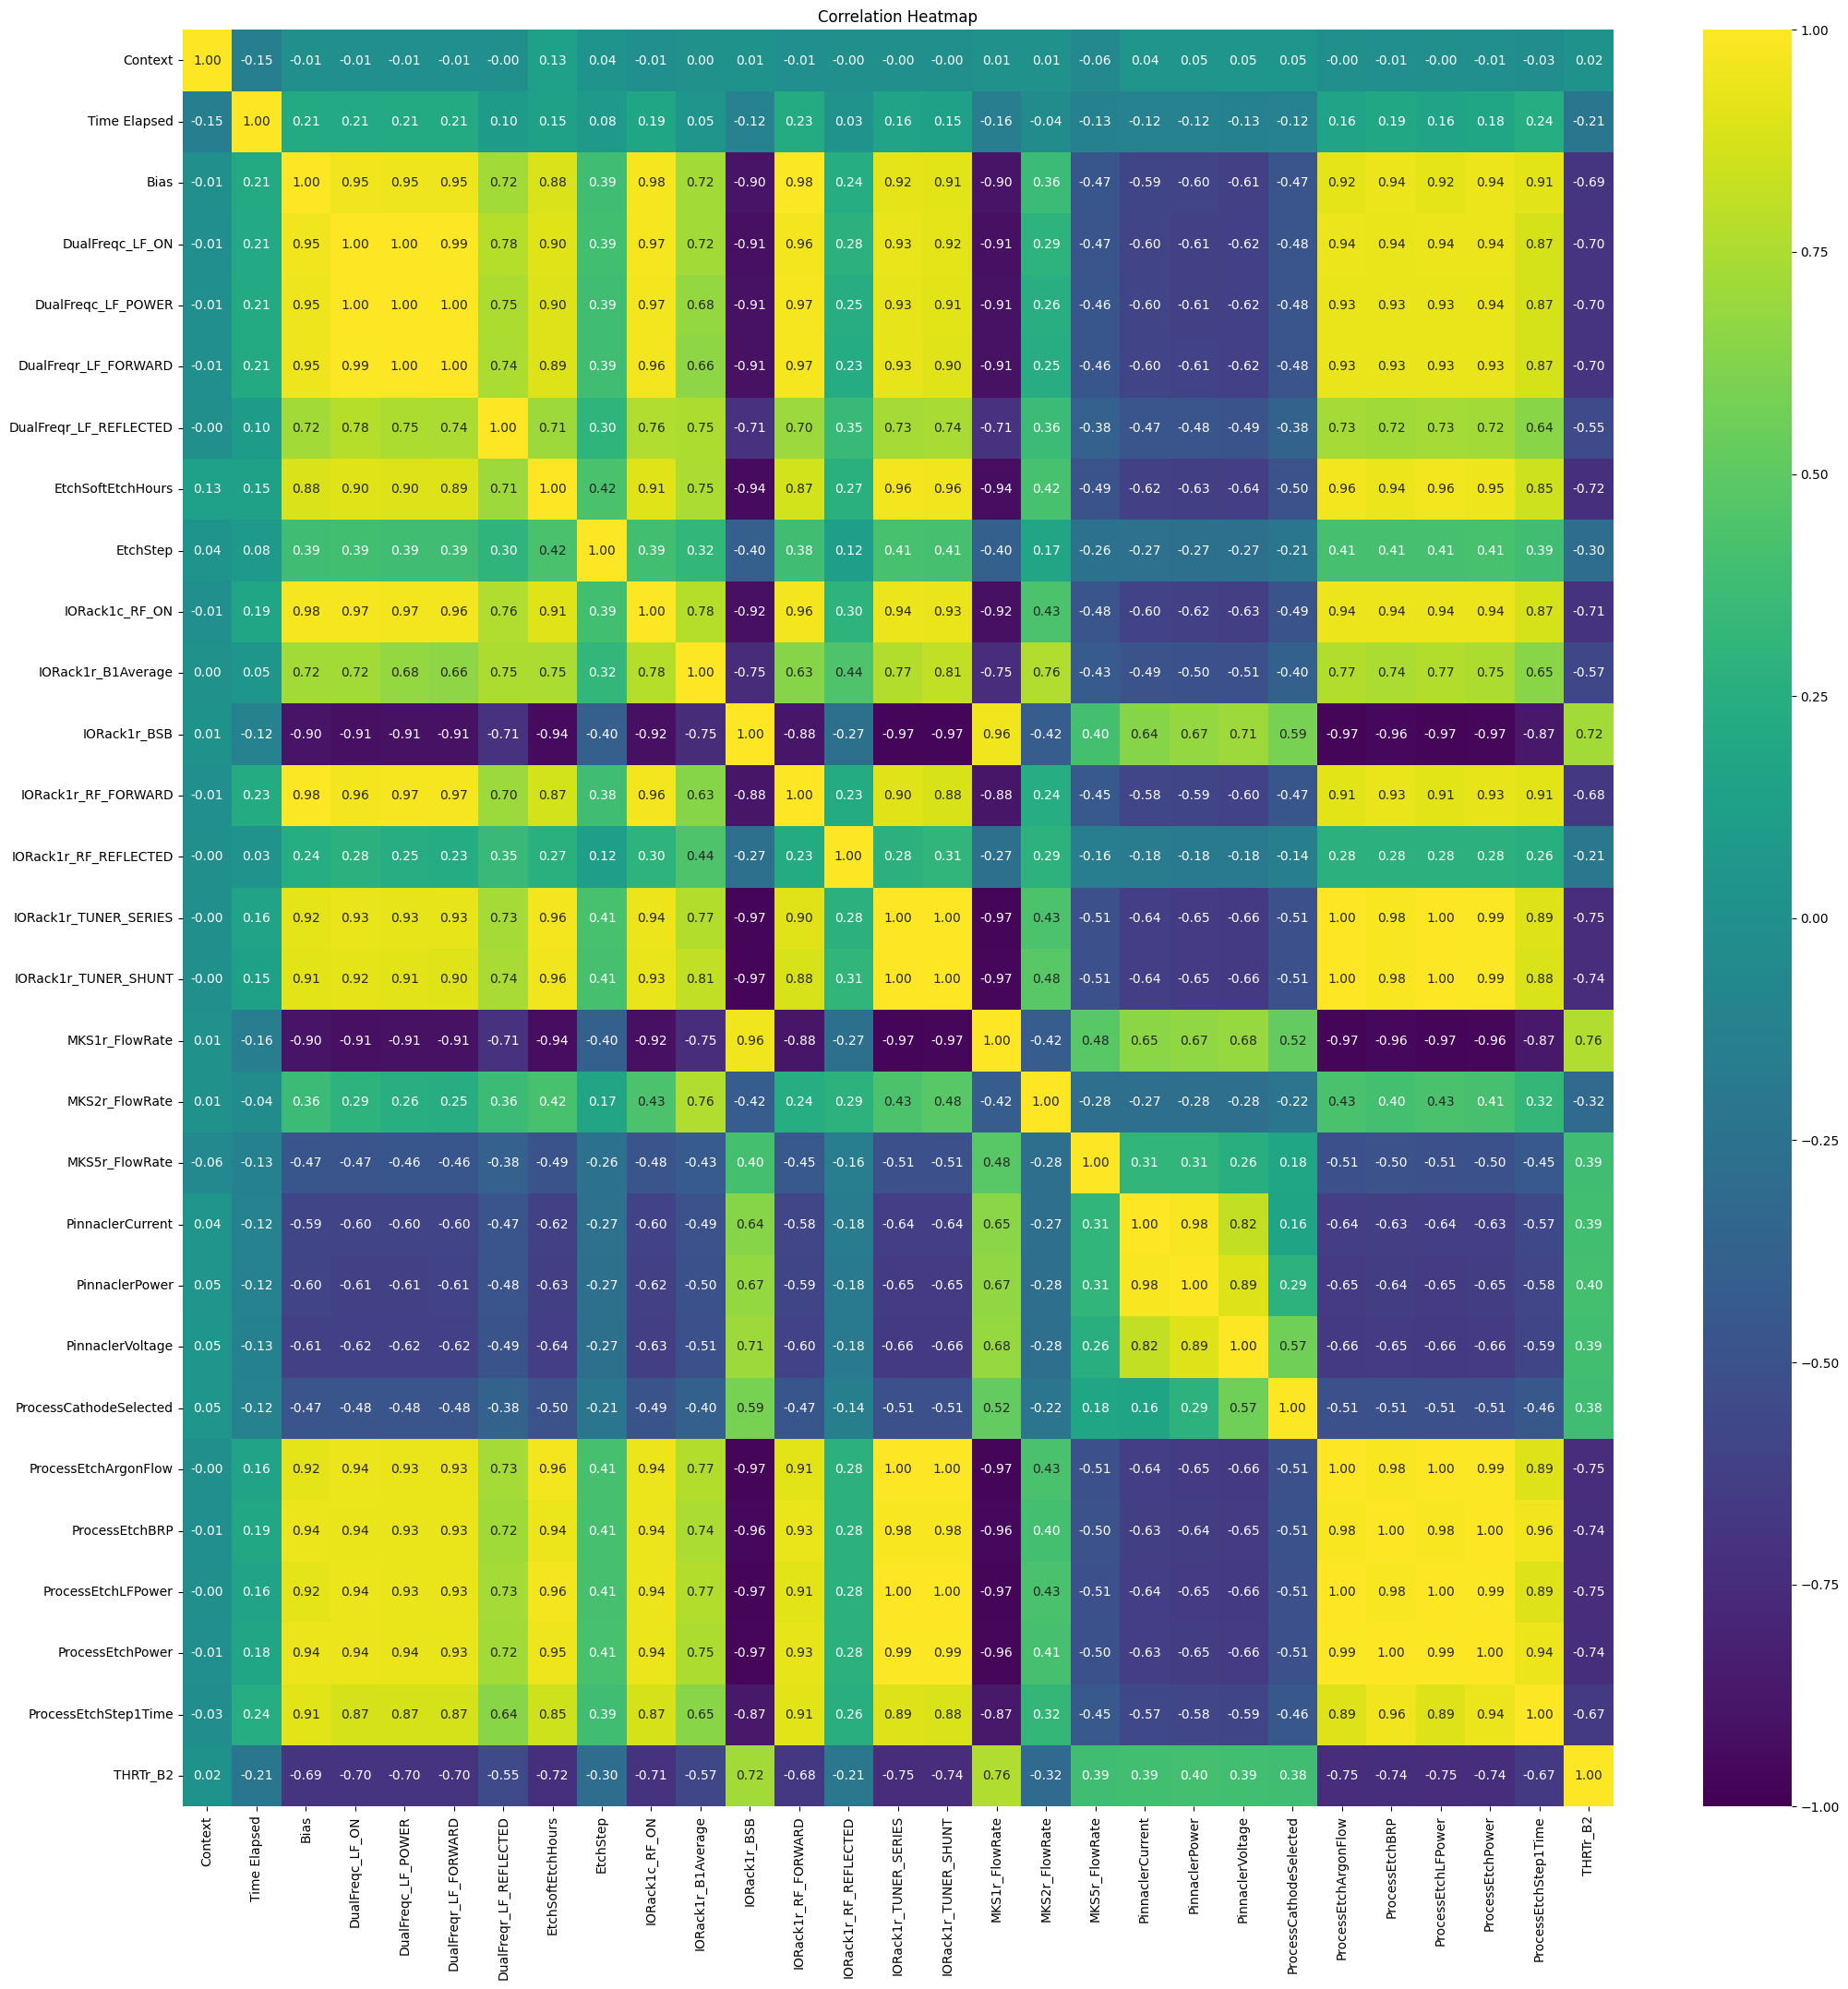

In [ ]:
# plot the heatmap of correlation
correlation_matrix = df.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix,cmap='viridis', annot=True, fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.savefig("correlation_matrix.png", bbox_inches='tight')
plt.show()

In [ ]:
correlation_matrix

,Context,Time Elapsed,Bias,DualFreqc_LF_ON,DualFreqc_LF_POWER,DualFreqr_LF_FORWARD,DualFreqr_LF_REFLECTED,EtchSoftEtchHours,EtchStep,IORack1c_RF_ON,IORack1r_B1Average,IORack1r_BSB,IORack1r_RF_FORWARD,IORack1r_RF_REFLECTED,IORack1r_TUNER_SERIES,IORack1r_TUNER_SHUNT,MKS1r_FlowRate,MKS2r_FlowRate,MKS5r_FlowRate,PinnaclerCurrent,PinnaclerPower,PinnaclerVoltage,ProcessCathodeSelected,ProcessEtchArgonFlow,ProcessEtchBRP,ProcessEtchLFPower,ProcessEtchPower,ProcessEtchStep1Time,THRTr_B2
Context,1.000000,-0.152085,-0.007609,-0.007923,-0.008585,-0.008564,-0.000427,0.130927,0.037024,-0.007895,0.001475,0.009974,-0.014592,-0.002709,-0.004777,-0.001865,0.005457,0.006885,-0.056340,0.043746,0.046214,0.053545,0.048672,-0.004762,-0.013111,-0.004710,-0.010974,-0.025796,0.020200
Time Elapsed,-0.152085,1.000000,0.214309,0.205847,0.212205,0.214629,0.097646,0.145799,0.075154,0.185901,0.050974,-0.120125,0.225454,0.026093,0.156570,0.145930,-0.159813,-0.037167,-0.129060,-0.124412,-0.119712,-0.129893,-0.123297,0.157556,0.193053,0.157548,0.184368,0.237936,-0.211892
Bias,-0.007609,0.214309,1.000000,0.954427,0.953026,0.951582,0.724764,0.883515,0.388852,0.975501,0.721811,-0.896749,0.984776,0.241460,0.918596,0.906447,-0.897114,0.362309,-0.466219,-0.588482,-0.601479,-0.611270,-0.473807,0.920766,0.941130,0.920731,0.938714,0.910272,-0.688690
DualFreqc_LF_ON,-0.007923,0.205847,0.954427,1.000000,0.995143,0.991721,0.781059,0.901723,0.390638,0.970451,0.719143,-0.914525,0.961765,0.281045,0.933900,0.918648,-0.914574,0.289996,-0.470064,-0.600147,-0.613547,-0.623653,-0.483199,0.939018,0.937239,0.938982,0.940604,0.870751,-0.702326
DualFreqc_LF_POWER,-0.008585,0.212205,0.953026,0.995143,1.000000,0.998997,0.752878,0.896984,0.389206,0.965461,0.676033,-0.910156,0.969088,0.246834,0.929371,0.908367,-0.910331,0.257076,-0.463782,-0.597280,-0.610739,-0.620899,-0.480891,0.934531,0.934492,0.934496,0.937393,0.871011,-0.699073
DualFreqr_LF_FORWARD,-0.008564,0.214629,0.951582,0.991721,0.998997,1.000000,0.743233,0.894852,0.390385,0.962030,0.662085,-0.908038,0.969667,0.231321,0.927286,0.904526,-0.908263,0.246992,-0.461471,-0.595890,-0.609358,-0.619526,-0.479772,0.931776,0.932334,0.931819,0.934971,0.870383,-0.697483
DualFreqr_LF_REFLECTED,-0.000427,0.097646,0.724764,0.781059,0.752878,0.743233,1.000000,0.708998,0.304043,0.760955,0.752912,-0.714999,0.696640,0.347055,0.729577,0.736897,-0.714230,0.361790,-0.383477,-0.469210,-0.479100,-0.486514,-0.377777,0.733812,0.717029,0.733842,0.723561,0.641369,-0.548526
EtchSoftEtchHours,0.130927,0.145799,0.883515,0.901723,0.896984,0.894852,0.708998,1.000000,0.422468,0.905818,0.745238,-0.937967,0.866420,0.267754,0.962600,0.960644,-0.936145,0.418934,-0.490862,-0.615530,-0.627603,-0.636588,-0.495585,0.962512,0.942151,0.962574,0.950295,0.845559,-0.718836
EtchStep,0.037024,0.075154,0.388852,0.390638,0.389206,0.390385,0.304043,0.422468,1.000000,0.392226,0.316458,-0.404060,0.383082,0.116458,0.414879,0.413059,-0.396439,0.173676,-0.257715,-0.265160,-0.266334,-0.266861,-0.213489,0.412752,0.413160,0.412862,0.414266,0.387745,-0.295774
IORack1c_RF_ON,-0.007895,0.185901,0.975501,0.970451,0.965461,0.962030,0.760955,0.905818,0.392226,1.000000,0.778204,-0.918709,0.960991,0.296145,0.939626,0.931481,-0.918432,0.430445,-0.481352,-0.602893,-0.616031,-0.625914,-0.485410,0.943313,0.940442,0.943278,0.944102,0.871964,-0.705269


In [ ]:
# Find features with high correlation
high_corr_features = set()  # Initialize a set to store features with high correlation

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # Threshold for high correlation
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

In [ ]:
high_corr_features = list(high_corr_features)
high_corr_features.remove("DualFreqc_LF_ON")

In [ ]:
df = df.drop(high_corr_features, axis=1)

In [ ]:
# lets extract the dependent and independent features
X = df.drop(['DualFreqc_LF_ON'], axis=1)
y = df['DualFreqc_LF_ON']

In [ ]:
Classes = ['OFF', 'ON']

### Split the data
* Splitting the data into training and testing sets is a crucial step in machine learning model development. It allows us to evaluate the performance of our model on unseen data. Typically, we reserve a portion of the dataset for training the model and another portion for testing its performance.

* We often use an 80:20 or 70:30 split, where 80% or 70% of the data is used for training and the remaining 20% or 30% is used for testing, respectively. This ensures that the model learns patterns from the majority of the data while still having unseen data to evaluate its generalization performance.

In [ ]:
# Setting the random seed ensures reproducibility of results when using functions that involve randomization.
np.random.seed(42)

In [ ]:
def splitting_dataset(X, y, test_size=0.20):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)

    # Check the shape of training and testing sets
    print("Training shape:", X_train.shape)
    print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [ ]:
# lets split the dataset
X_train, X_test, y_train, y_test = splitting_dataset(X, y , test_size=0.2)

Training shape: (94574, 13)
Testing shape: (23644, 13)


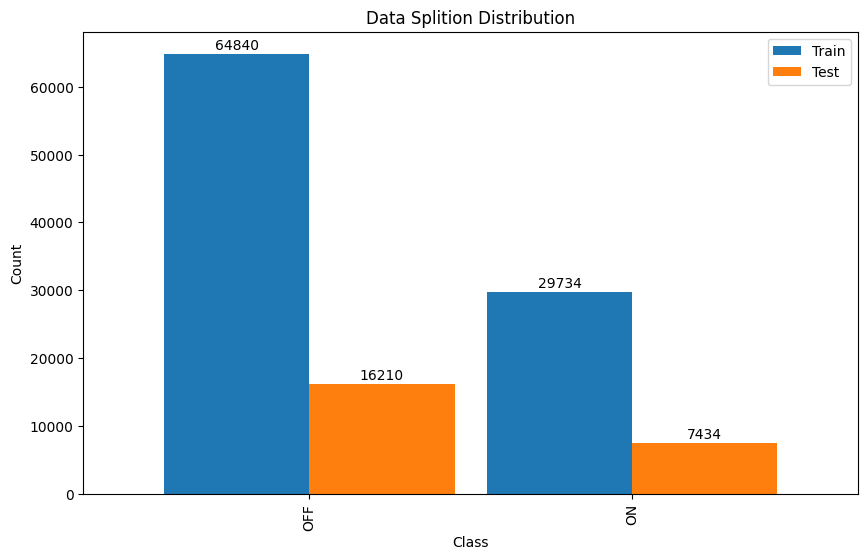

In [ ]:
# get the value counts
y_train_series = pd.Series(y_train).astype(int)
y_test_series = pd.Series(y_test).astype(int)

class_mapping = {index: class_name for index, class_name in enumerate(Classes)}

train_value_counts = y_train_series.map(class_mapping).value_counts()
test_value_counts = y_test_series.map(class_mapping).value_counts()


df = pd.DataFrame({'Train': train_value_counts, 'Test': test_value_counts})


fig, ax = plt.subplots(figsize=(10, 6))

# Create a grouped bar plot
ax = df.plot.bar(width=0.9, ax=ax)

for p in ax.containers:
    ax.bar_label(p, label_type='edge', padding=1)

# Set the labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Data Splition Distribution')

plt.savefig("train_test_val.png", bbox_inches='tight')
# Show the plot
plt.show()

## Normalize the Data
* Normalization, in the context of data analysis and machine learning, refers to the process of transforming numerical data into a standardized scale. The goal of normalization is to bring different features or variables onto a similar scale to ensure fair comparisons and improve the performance of certain algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
# Import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

### Performance Metrics
* Accuracy: It measures the proportion of correctly classified instances out of the total instances in the dataset. It's calculated as (TP + TN) / (TP + TN + FP + FN), where TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives, and FN is the number of false negatives.

* Precision: It measures the proportion of true positive predictions among all positive predictions made by the model. It's calculated as TP / (TP + FP), where TP is the number of true positives and FP is the number of false positives.

* Recall (Sensitivity): It measures the proportion of true positive predictions among all actual positive instances in the dataset. It's calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

* F1 Score: It is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. It's calculated as 2 * (Precision * Recall) / (Precision + Recall).

* AUC-ROC Score: It measures the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate. A higher AUC-ROC score indicates better discrimination between positive and negative instances.

* Confusion Matrix: It is a table that visualizes the performance of a classification model by comparing predicted labels with actual labels. It consists of four values: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

def check_performance_metrics(model, X_train, y_train , y_test, y_pred, classes, show_cm=False, show_roc=False):

    accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
    precision = round(precision_score(y_pred, y_test) * 100, 2)
    recall = round(recall_score(y_pred, y_test) * 100, 2)
    f1_scr = round(f1_score(y_pred, y_test) * 100, 2)

    # Calculate AUC-ROC score
    auc_roc_score = round(roc_auc_score(y_test, y_pred)*100, 2)

    print("Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print("AUC-ROC Score: {}%".format(auc_roc_score))
    print()

    if show_cm:
        print("Classification Report:")
        print(classification_report(y_pred, y_test, target_names=classes))
        print()
        print("Confusion Matrix:")
        fig, ax = plt.subplots(figsize=(7, 5))
        ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                                  ax=ax,
                                                  display_labels=classes,
                                                  xticks_rotation='vertical')
        plt.show()

    if show_roc:
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return pd.DataFrame([{
        'Model': model.__class__.__name__,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr,
        'AUC-ROC Score': auc_roc_score,
    }])


Accuracy: 99.91%
Precision: 99.95%
Recall: 99.77%
F1-Score: 99.86%
AUC-ROC Score: 99.92%

Classification Report:
              precision    recall  f1-score   support

         OFF       1.00      1.00      1.00     16197
          ON       1.00      1.00      1.00      7447

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644


Confusion Matrix:


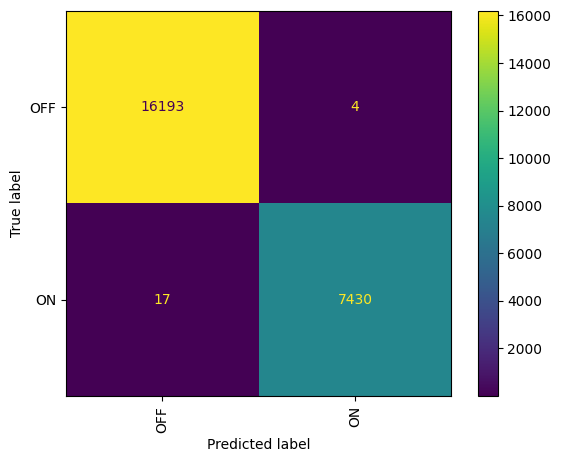

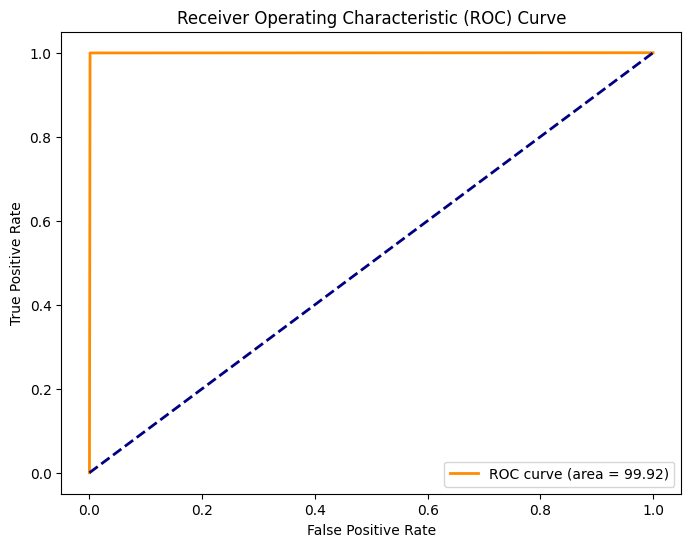

In [ ]:
# Train LogisticRegression Model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
res_lr = check_performance_metrics(model, X_train_std, y_train, y_test,y_pred, Classes, show_cm=True, show_roc=True)

Accuracy: 99.98%
Precision: 99.96%
Recall: 99.97%
F1-Score: 99.97%
AUC-ROC Score: 99.97%

Classification Report:
              precision    recall  f1-score   support

         OFF       1.00      1.00      1.00     16211
          ON       1.00      1.00      1.00      7433

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644


Confusion Matrix:


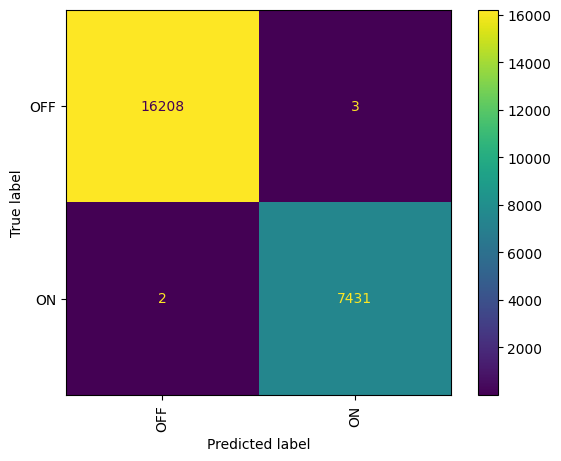

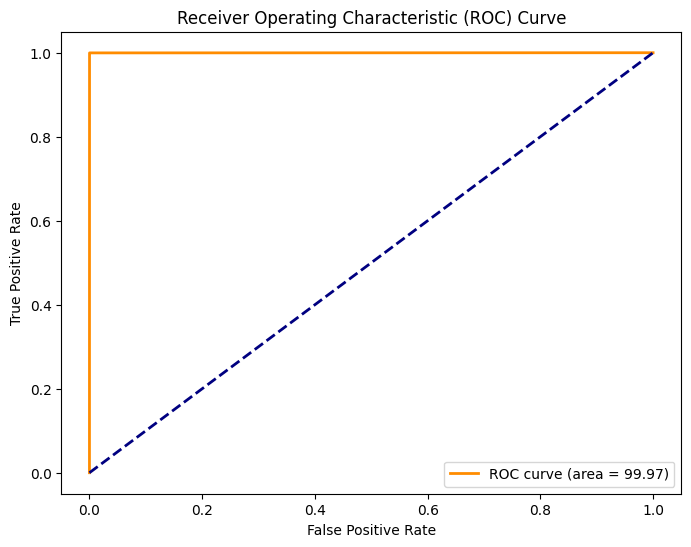

In [ ]:
# Train DecisionTreeClassifier Model
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
res_dt = check_performance_metrics(model, X_train_std, y_train, y_test,y_pred, Classes, show_cm=True, show_roc=True)

Accuracy: 99.82%
Precision: 99.53%
Recall: 99.91%
F1-Score: 99.72%
AUC-ROC Score: 99.74%

Classification Report:
              precision    recall  f1-score   support

         OFF       1.00      1.00      1.00     16238
          ON       1.00      1.00      1.00      7406

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644


Confusion Matrix:


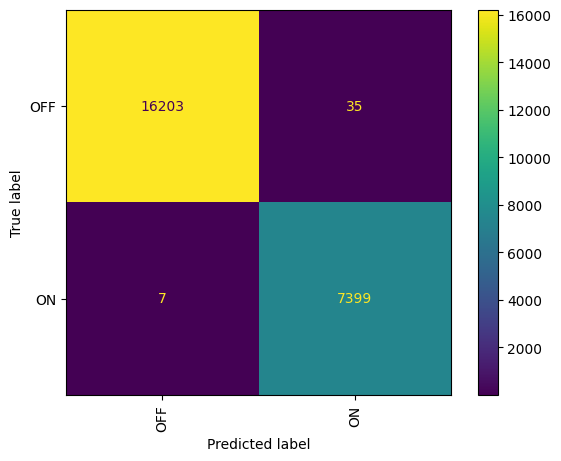

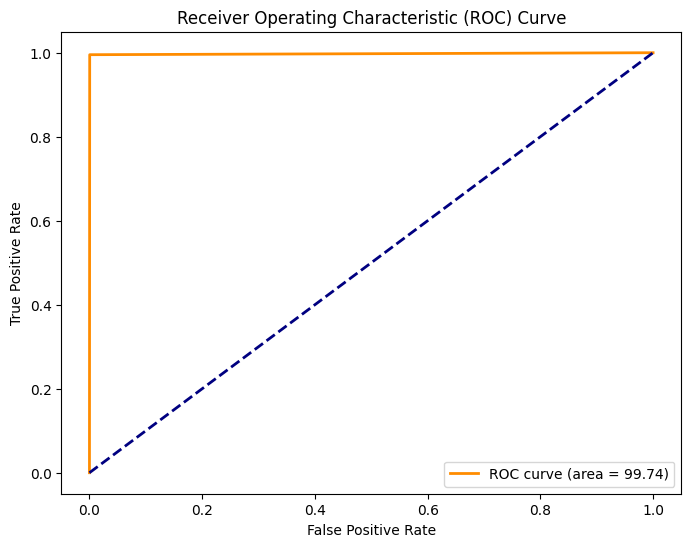

In [ ]:
# Train SGDClassifier Model
model = SGDClassifier(class_weight='balanced')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
res_sgd = check_performance_metrics(model, X_train_std, y_train, y_test,y_pred, Classes, show_cm=True, show_roc=True)

Accuracy: 97.37%
Precision: 99.99%
Recall: 92.28%
F1-Score: 95.98%
AUC-ROC Score: 98.07%

Classification Report:
              precision    recall  f1-score   support

         OFF       0.96      1.00      0.98     15589
          ON       1.00      0.92      0.96      8055

    accuracy                           0.97     23644
   macro avg       0.98      0.96      0.97     23644
weighted avg       0.97      0.97      0.97     23644


Confusion Matrix:


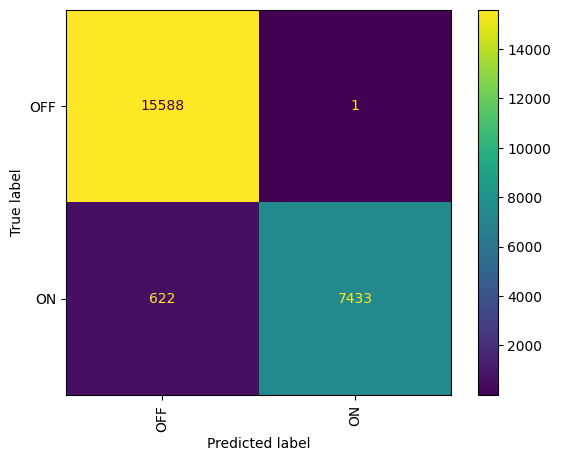

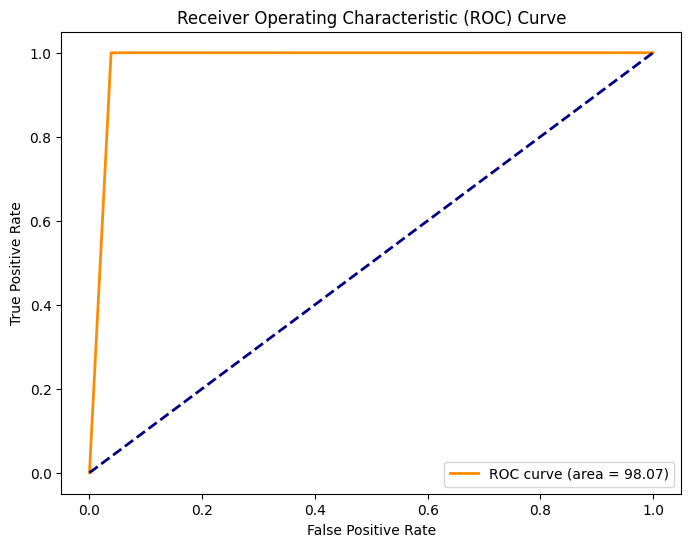

In [ ]:
# Train GaussianNB Model
model = GaussianNB()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
res_nb = check_performance_metrics(model, X_train_std, y_train, y_test,y_pred, Classes, show_cm=True, show_roc=True)

Accuracy: 99.99%
Precision: 99.99%
Recall: 99.97%
F1-Score: 99.98%
AUC-ROC Score: 99.99%

Classification Report:
              precision    recall  f1-score   support

         OFF       1.00      1.00      1.00     16209
          ON       1.00      1.00      1.00      7435

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644


Confusion Matrix:


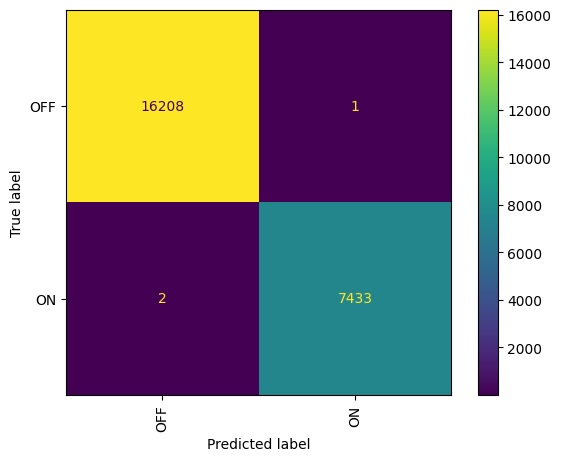

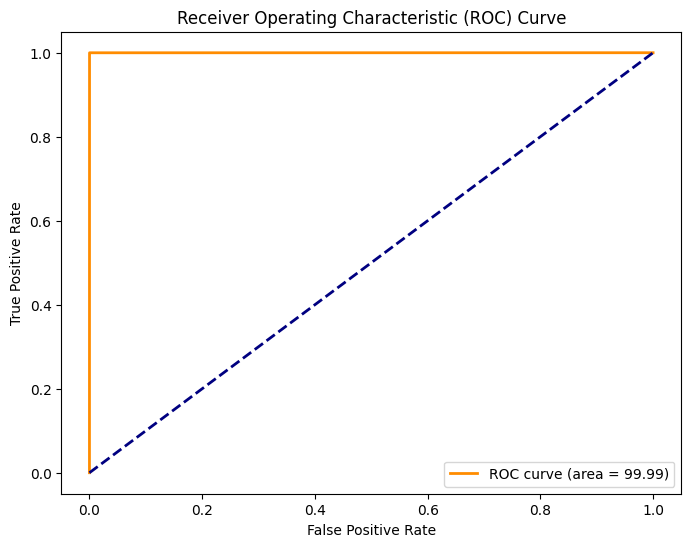

In [ ]:
# Train RandomForestClassifier Model
model = RandomForestClassifier()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
res_rf = check_performance_metrics(model, X_train_std, y_train, y_test,y_pred, Classes, show_cm=True, show_roc=True)

Accuracy: 99.98%
Precision: 99.96%
Recall: 99.99%
F1-Score: 99.97%
AUC-ROC Score: 99.98%

Classification Report:
              precision    recall  f1-score   support

         OFF       1.00      1.00      1.00     16212
          ON       1.00      1.00      1.00      7432

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644


Confusion Matrix:


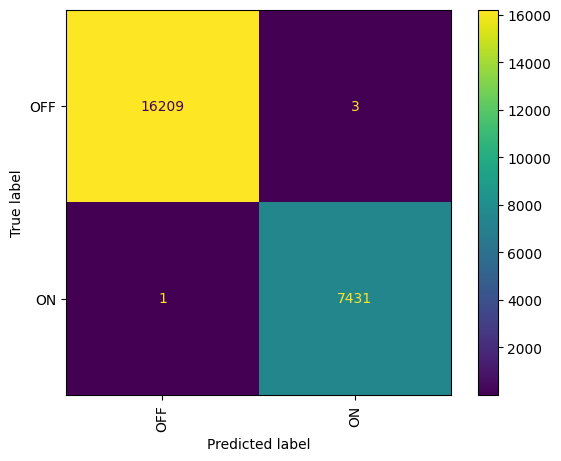

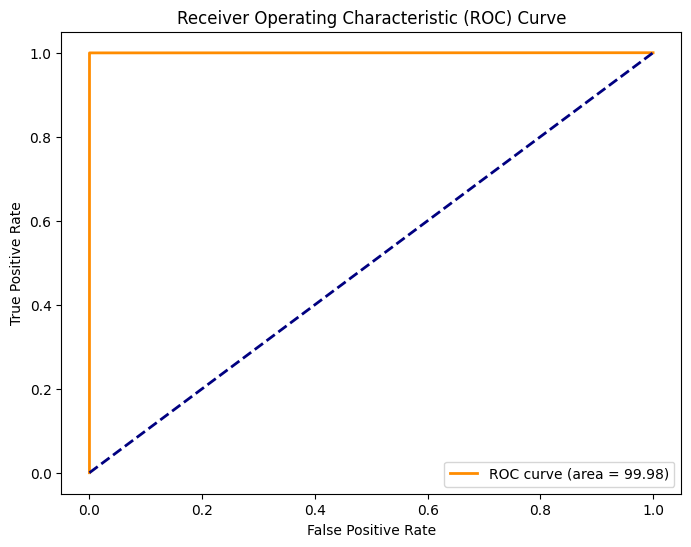

In [ ]:
# Train XGBClassifier Model
model = xgb.XGBClassifier()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
res_xgb = check_performance_metrics(model, X_train_std, y_train, y_test,y_pred, Classes, show_cm=True, show_roc=True)

In [ ]:
final_df = pd.concat([res_lr, res_dt, res_sgd, res_nb, res_rf, res_xgb]).reset_index(drop=True)
final_df

,Model,Testing Accuracy,Precision,Recall,F1,AUC-ROC Score
0,LogisticRegression,99.91,99.95,99.77,99.86,99.92
1,DecisionTreeClassifier,99.98,99.96,99.97,99.97,99.97
2,SGDClassifier,99.82,99.53,99.91,99.72,99.74
3,GaussianNB,97.37,99.99,92.28,95.98,98.07
4,RandomForestClassifier,99.99,99.99,99.97,99.98,99.99
5,XGBClassifier,99.98,99.96,99.99,99.97,99.98


### **LSTM**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train.shape

(94574, 13)

In [ ]:
EPOCHS = 5
BATCH_SIZE = 32

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# data should be reshaped in the form (samples, time steps, features)
# If not, reshape your X_train and X_test accordingly
X_train__ = X_train_std.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test__ = X_test_std.reshape(X_test.shape[0], 1, X_test.shape[1])

model_lstm = Sequential([
    LSTM(64, input_shape=(X_train__.shape[1], X_train__.shape[2]), return_sequences=True),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history_lstm = model_lstm.fit(X_train__, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                               validation_data=(X_test__, y_test), callbacks=[early_stopping])

Epoch 1/5
2956/2956 [==============================] - 29s 7ms/step - loss: 0.0187 - accuracy: 0.9980 - val_loss: 0.0038 - val_accuracy: 0.9984
Epoch 2/5
2956/2956 [==============================] - 25s 9ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9982
Epoch 3/5
2956/2956 [==============================] - 29s 10ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9982
Epoch 4/5
2956/2956 [==============================] - 23s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9983
Epoch 5/5
2956/2956 [==============================] - 36s 12ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9984


In [ ]:
def plotGraphs(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs_range=range(len(history.history['loss']))

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, training_loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

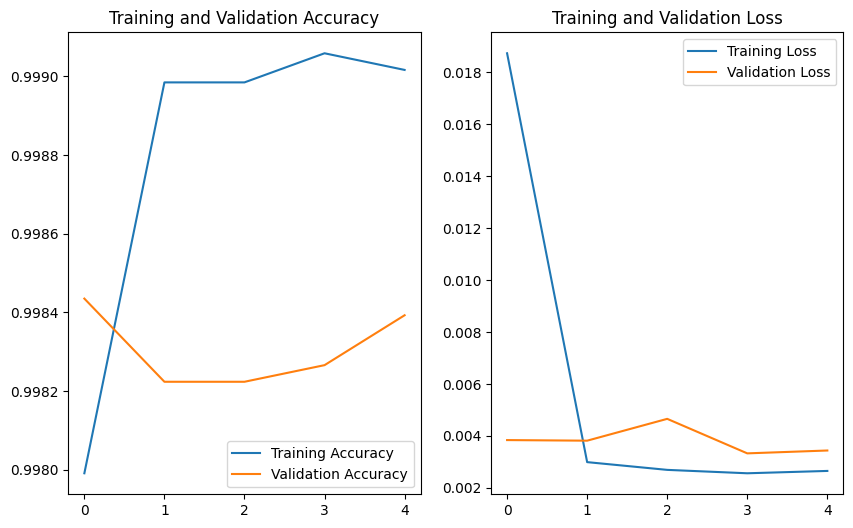

In [ ]:
plotGraphs(history_lstm)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

def check_deep_learning_performance_metrics(model, X_train, y_train, X_test, y_test, threshold=0.5, show_cm=False, show_roc=False):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > threshold).astype(int)

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    f1_scr = round(f1_score(y_test, y_pred) * 100, 2)

    # Calculate AUC-ROC score
    auc_roc_score = round(roc_auc_score(y_test, y_pred_proba) * 100, 2)

    print("Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print("AUC-ROC Score: {}%".format(auc_roc_score))
    print()

    if show_cm:
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print()

    if show_roc:
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    return pd.DataFrame([{
        'Model': model.__class__.__name__,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr,
        'AUC-ROC Score': auc_roc_score,
    }])


739/739 [==============================] - 4s 3ms/step
Accuracy: 99.84%
Precision: 99.91%
Recall: 99.58%
F1-Score: 99.74%
AUC-ROC Score: 100.0%

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16210
         1.0       1.00      1.00      1.00      7434

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644




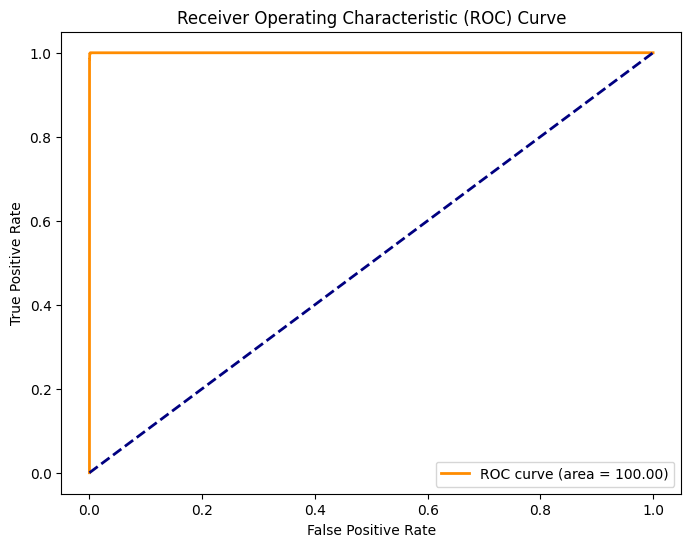

In [ ]:
res_lstm = check_deep_learning_performance_metrics(model_lstm, X_train__, y_train, X_test__, y_test, threshold=0.5, show_cm=True, show_roc=True)

### **ANN (Artificial Neural Network)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set the number of features
input_dim = X_train_std.shape[1]

# Define the architecture of the ANN
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.3))  # Adding a dropout layer with a dropout rate of 0.5
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                896       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train_std, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test_std, y_test), callbacks=[early_stopping])

Epoch 1/5
2956/2956 [==============================] - 19s 5ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0039 - val_accuracy: 0.9986
Epoch 2/5
2956/2956 [==============================] - 11s 4ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0049 - val_accuracy: 0.9982
Epoch 3/5
2956/2956 [==============================] - 8s 3ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9983
Epoch 4/5
2956/2956 [==============================] - 11s 4ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9982
Epoch 5/5
2956/2956 [==============================] - 16s 6ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9982


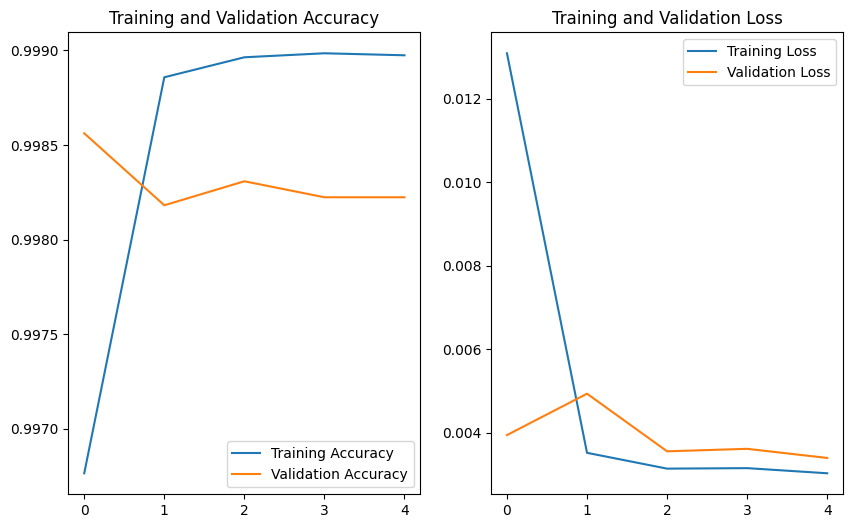

In [ ]:
plotGraphs(history)

739/739 [==============================] - 1s 2ms/step
Accuracy: 99.82%
Precision: 99.91%
Recall: 99.53%
F1-Score: 99.72%
AUC-ROC Score: 100.0%

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16210
         1.0       1.00      1.00      1.00      7434

    accuracy                           1.00     23644
   macro avg       1.00      1.00      1.00     23644
weighted avg       1.00      1.00      1.00     23644




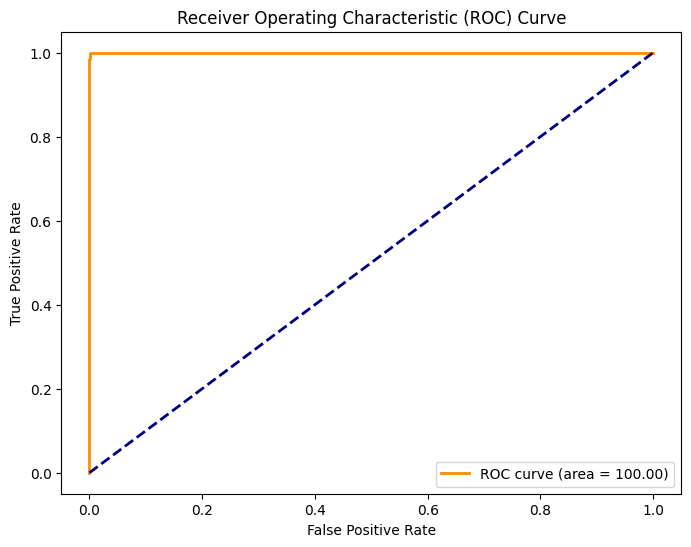

In [ ]:
res_ann = check_deep_learning_performance_metrics(model, X_train_std, y_train, X_test_std, y_test, threshold=0.5, show_cm=True, show_roc=True)

In [ ]:
final_df_deep = pd.concat([res_ann, res_lstm]).reset_index(drop=True)
final_df_deep['Model'] = final_df_deep['Model'].replace({'Sequential': 'ANN'}, regex=False)
final_df_deep.at[1, 'Model'] = 'LSTM'
final_df_deep

,Model,Testing Accuracy,Precision,Recall,F1,AUC-ROC Score
0,ANN,99.82,99.91,99.53,99.72,100.0
1,LSTM,99.84,99.91,99.58,99.74,100.0


## **All Models Evaluation**

In [ ]:
final_df_new = pd.concat([final_df, final_df_deep]).reset_index(drop=True)
final_df_new

,Model,Testing Accuracy,Precision,Recall,F1,AUC-ROC Score
0,LogisticRegression,99.91,99.95,99.77,99.86,99.92
1,DecisionTreeClassifier,99.98,99.96,99.97,99.97,99.97
2,SGDClassifier,99.82,99.53,99.91,99.72,99.74
3,GaussianNB,97.37,99.99,92.28,95.98,98.07
4,RandomForestClassifier,99.99,99.99,99.97,99.98,99.99
5,XGBClassifier,99.98,99.96,99.99,99.97,99.98
6,ANN,99.82,99.91,99.53,99.72,100.00
7,LSTM,99.84,99.91,99.58,99.74,100.00


In [ ]:
def plot_graph_results(results):
  # Set the 'Classifier' column as the index for easier plotting
  results = results.set_index('Model')

  # Create subplots for precision, recall, and F1-score in a 2x2 grid
  fig, axes = plt.subplots(2, 2, figsize=(15, 15))

  # Set color palette
  colors = ['steelblue', 'darkorange', 'limegreen', 'red', 'purple', 'gold', 'mediumorchid']

  # Plot precision
  bars1 = axes[0, 0].bar(results.index, results['Precision'], color=colors)
  axes[0, 0].set_title('Precision Scores')
  axes[0, 0].set_ylabel('Precision (%)')
  axes[0, 0].set_ylim(0, 100)

  # Plot recall
  bars2 = axes[0, 1].bar(results.index, results['Recall'], color=colors)
  axes[0, 1].set_title('Recall Scores')
  axes[0, 1].set_ylabel('Recall (%)')
  axes[0, 1].set_ylim(0, 100)

  # Plot F1-score
  bars3 = axes[1, 0].bar(results.index, results['F1'], color=colors)
  axes[1, 0].set_title('F1 Scores')
  axes[1, 0].set_xlabel('Classifier')
  axes[1, 0].set_ylabel('F1-Score (%)')
  axes[1, 0].set_ylim(0, 100)

  axes[1, 1].axis('off')

  for bars, ax in zip([bars1, bars2, bars3], axes.flatten()):
      for bar in bars:
          height = bar.get_height()
          ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

  # Rotate x-axis labels for better visibility
  for ax in axes.flat:
      ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

  plt.tight_layout()

  fig.suptitle('Manufacturing Raw Dataset', fontsize=16, y=1)

  # Display the plot
  plt.show()

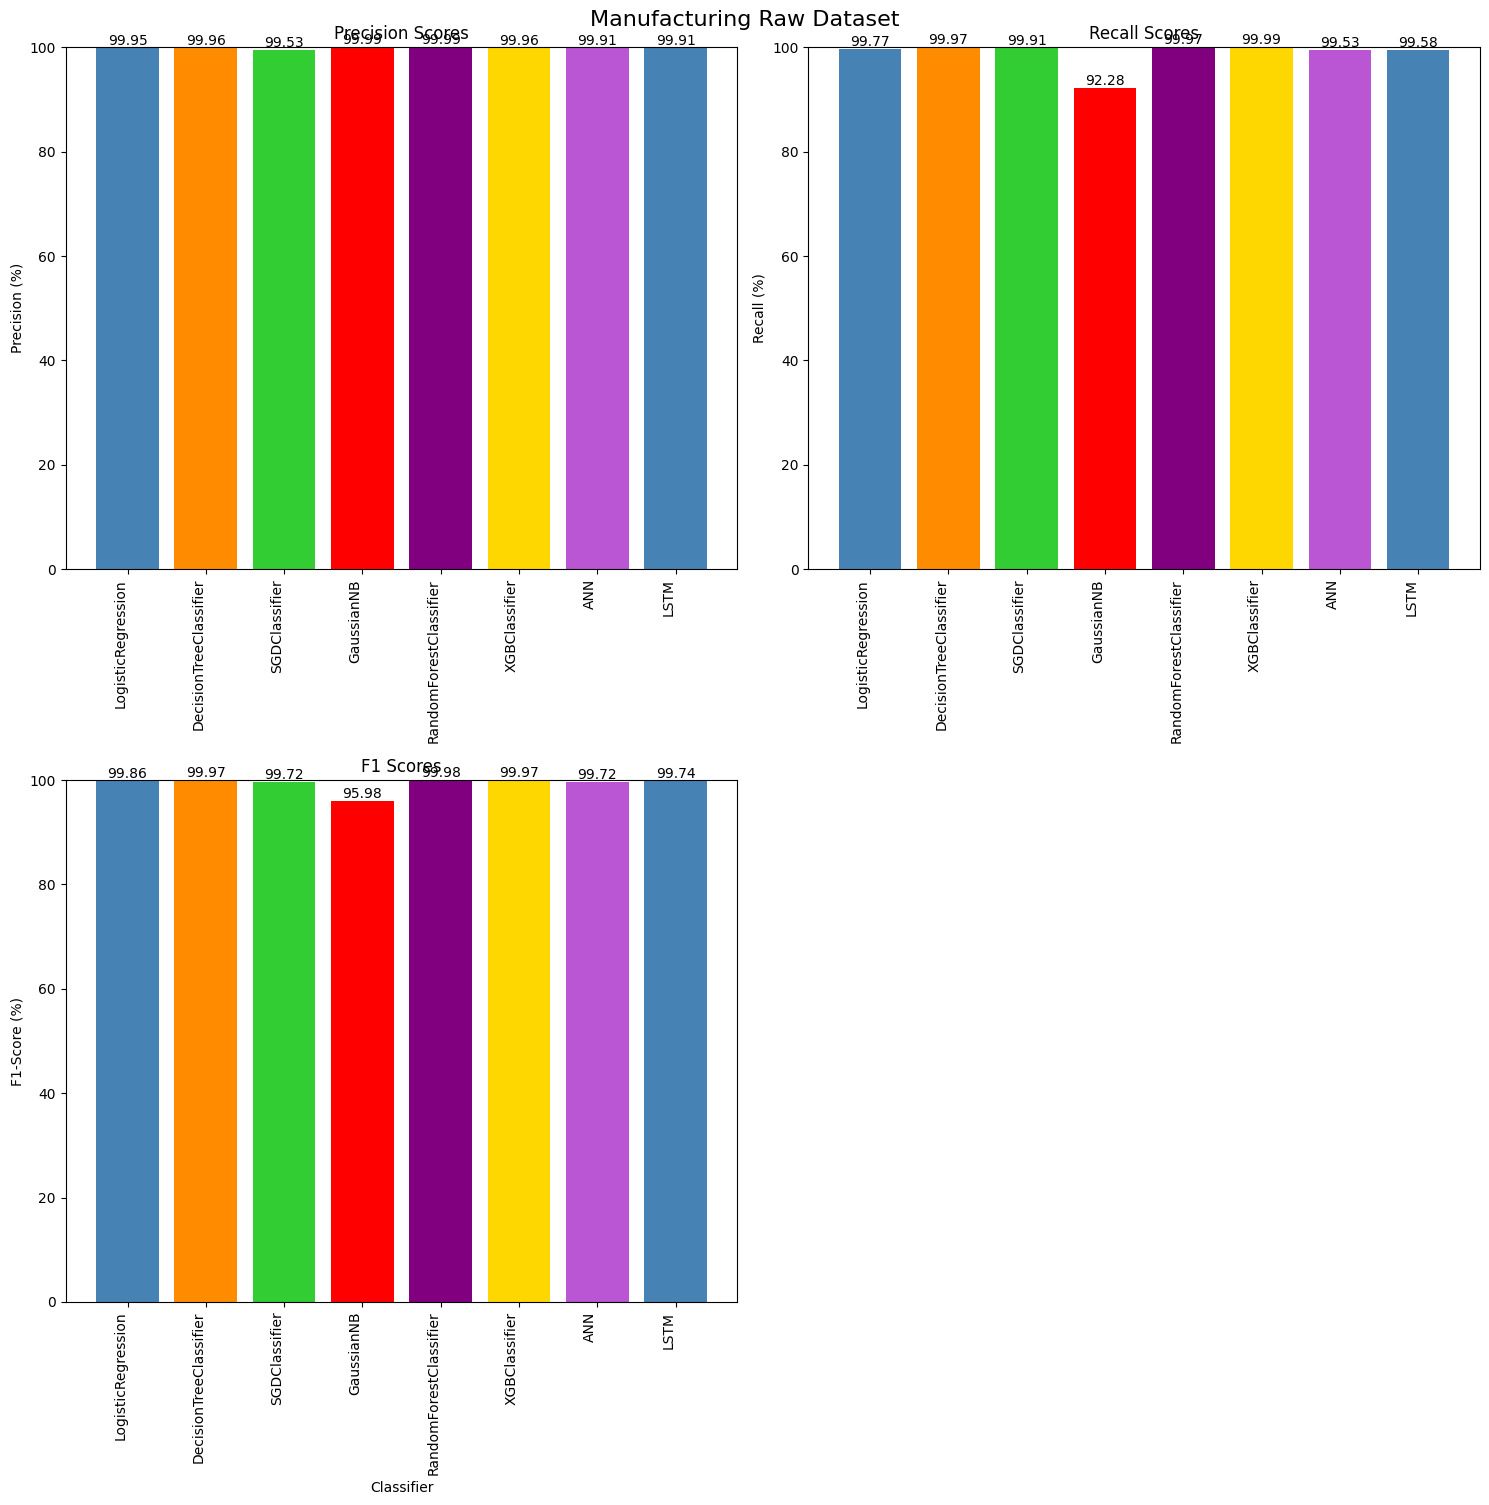

In [ ]:
plot_graph_results(final_df_new)